# House Pricing Prediction Project

## Problem Definition

### Introduction

The real estate market is one of the increasingly complicated and competitive markets in which it is essential to predict accurate price level for buyers, sellers, investors, and policy-makers. The housing market over the past few years has been very volatile the Australian housing market because of the various factors like; the state of the economy, population, demography and government policies among others (Australian Bureau of Statistics, 2021). They have led to the emergence of more disaggregate and precise way of forecasting house prices.

### Objective

The aims of this project are to:
- Create a sophisticated regression model in order to estimate prices of houses by using statistical and machine learning methodologies while taking into consideration attributes like the location, characteristics, and market conditions of each house.
- Identify and quantify the key factors that influence house prices across different regions of Australia.
- Comparatively analyse the different advanced regression techniques to be used in the analysis, both the conventional Statistical models and the modern Machine learning Models.
- Provide actionable recommendations for based on the data analysis.
- Design an easy to use tool that would enable willing stakeholders to gauge approximate estimates of house prices given peculiarities such as the property’s features and market conditions prevalent at any given time.

### Data Description
The dataset will be extensive and includes all residential property sales in Australia and is sourced from the Australian Property Institute (API) and CoreLogic. This dataset contains data on more than 500000 real estate transactions in the main Australian cities for the period 2015–2023 (CoreLogic, 2023).
The dataset can be downloaded from the API from CoreLogic, which makes it to be current and accurate. Key features of the dataset include
 a) **Property attributes**: location, land size, number of bedrooms/bathrooms, property type, age of property
 b) **Transaction details**: sale price, date of sale
 c) **Neighbourhood characteristics**: proximity to schools, public transport, shopping centres
 d) **Economic indicators**: local unemployment rates, median income
 e) **Market conditions**: interest rates, housing supply metrics
 
### Definition of Key Details
- `Suburb`: Suburb
- `Address`: Address
- `Rooms`: Number of rooms
- `Price`: Price in Australian dollars
- `Method`:
    >- **S** - property sold;
    >- **SP** - property sold prior;
    >- **PI** - property passed in;
    >- **PN** - sold prior not disclosed;
    >- **SN** - sold not disclosed;
    >- **NB** - no bid;
    >- **VB** - vendor bid;
    >- **W** - withdrawn prior to auction;
    >- **SA** - sold after auction;
    >- **SS** - sold after auction price not disclosed.
    >- **N/A** - price or highest bid not available.
- `Type`:
    >- **br** - bedroom(s);
    >- **h** - house,cottage,villa, semi,terrace;
    >- **u** - unit, duplex;
    >- **t** - townhouse;
    >- **dev site** - development site;
    >- **o res** - other residential.
- `SellerG`: Real Estate Agent
- `Date`: Date sold
- `Distance`: Distance from CBD in Kilometres
- `Regionname`: General Region (West, North West, North, North east …etc)
- `Propertycount`: Number of properties that exist in the suburb.
- `Bedroom2` : Scraped # of Bedrooms (from different source)
- `Bathroom`: Number of Bathrooms
- `Car`: Number of carspots
- `Landsize`: Land Size in Metres
- `BuildingArea`: Building Size in Metres
- `YearBuilt`: Year the house was built
- `CouncilArea`: Governing council for the area
- `Lattitude`: Self explanitory
- `Longtitude`: Self explanitory

### Algorithms and Techniques

####  Predictive Modeling
To predict house prices, the following regression algorithms will be implemented:
- **Decision Tree Regressor**: This algorithm will help model relationships between property features and their prices. It is chosen for its interpretability and ability to handle both categorical and numerical data effectively.
- **Support Vector Machine (SVM) Regressor**: This algorithm is useful for capturing complex relationships in the data, especially when the data is not linearly separable.
- **Random Forest Regressor**: This ensemble learning method will improve prediction accuracy by combining the results of multiple decision trees, reducing the risk of overfitting.

####  Feature Importance Analysis
Feature importance measures from tree-based models (e.g., Random Forest) will be used to identify the most significant factors influencing house prices. This analysis will help in understanding which property attributes have the highest impact on pricing.

####  Model Comparison
The performance of the chosen algorithms will be compared using evaluation metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²). These metrics are widely used for regression problems and will help assess the accuracy and reliability of our models (Hyndman & Athanasopoulos, 2021). 
#### Data Visualization
Data visualization techniques, including scatter plots, heatmaps, and bar charts, will be employed to analyze trends and relationships within the data. These visualizations will provide intuitive insights into the housing market (Wang & Zeng, 2022).
#### Model Deployment
For evaluating the performance of our predictive models, we will use the following metrics

### Evaluation Measures 
For evaluating the performance of our predictive models, we will use the following metrics:
- **Root Mean Squared Error (RMSE)**: To measure the average magnitude of errors between predicted and actual prices.
- **Mean Absolute Error (MAE)**: To assess the average absolute difference between predicted and actual values.
- **R-squared (R²)**: To determine the proportion of variance in the dependent variable that is predictable from the independent variables.
These metrics are appropriate for regression problems like predicting house prices and will help us gauge the accuracy and reliability of our models (Anglin & Gencay, 1996).


## Setup

### Installation

In [1]:
%pip install pyodbc
%pip install pingouin
%pip install plotly
%pip install sqlalchemy
%pip install imbalanced-learn
%pip install nbformat --upgrade

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



### Importation

In [2]:
# Data Handling
import numpy as np
import pandas as pd
import seaborn as sns
import math  # Basic mathematical operations
import pingouin as pg
from sqlalchemy import create_engine, Table, MetaData 

# Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px

# Statistical Analysis
from statsmodels.tsa.stattools import adfuller
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# other packages
import pyodbc
import joblib
import os, pickle

pd.set_option('display.max_columns', None)

# Feature Processing
from scipy.stats import chi2_contingency as chi2
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder, FunctionTransformer,PowerTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, auc, recall_score, precision_score,confusion_matrix,roc_auc_score,roc_curve, make_scorer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from numpy import log1p
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import RandomizedSearchCV
import pickle


# Other Packages
import warnings  # To handle warnings in a way that they can be ignored
warnings.filterwarnings('ignore')

## Data Loading

### Loading Data From an Excel File

In [3]:
dataset = pd.read_excel("Data Set - Melbourne.xlsx")
dataset.head()

Suburb           Address  Rooms Type    Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0 2016-12-03       2.5      3067         2         1  1.0       202   
1 2016-02-04       2.5      3067         2         1  0.0       156   
2 2017-03-04       2.5      3067         3         2  0.0       134   
3 2017-03-04       2.5      3067         3         2  1.0        94   
4 2016-06-04       2.5      3067         3         1  2.0       120   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN       Yarra   -37.7996    144.9984   
1          79.0     1900.0       Yarra   -37.8079    144.9934   
2         150.0     1900.0       Yarra   -37.8093    144.9944   
3           NaN        NaN       Yarra   -37.7969    144.9969   
4         142.0     2014.0       Yarra   -37.8072    144.9941   

              Regionname  Propertycount  
0  Northern Metropolitan           4019  
1  Northern Metropolitan           4019  
2  Northern Metropolitan           4019  
3  Northern Metropolitan           4019  
4  Northern Metropolitan           4019

## Hypothesis and Analytical Questions

### Hypothesis

- `Null Hypothesis (H0)`: House Prices in Melbourne are not affected by the properity attributes, the transaction details, neighbourhood characteristics nor the market conditions.

- `Alternative Hypothesis (H1)`: House Prices in Melbourne are affected by the properity attributes, the transaction details, neighbourhood characteristics nor the market conditions.

### Analytical Questions

1. Which Region has the most/least number of properities?
2. Which properity based on the number of bedrooms sold the most/least?
3. What is the most common number of carspots for properties in Albion?
4. How many properities were build in the year that most of the properities were build?

## Data Understanding

### Exploratory Data Analysis
> This phase involves a comprehensive examination of the datasets to extract meaningful insights about the available variables, their distributions, and interrelationships. By conducting this thorough analysis, we aim to develop an initial understanding of the datasets, which will serve two primary purposes: first, it will help us identify any potential data quality issues, and second, it will inform our approach to data cleaning and pre-processing.

In [4]:
# getting the structure of the dataset
print(f"This dataset has {dataset.shape[0]:,} Rows and {dataset.shape[1]} Columns:")

This dataset has 13,580 Rows and 21 Columns:


In [5]:
# getting column information
print(f"Data types for this datase are:")
print(dataset.info())
print('==='*15)

Data types for this datase are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  int64         
 14  BuildingArea   7130 non-null   float64

In [6]:
# dataset summary statistics for numerical attributes
print(f"The Dataset Summary Statistics:")
print('---'*30)
print(dataset.describe())
print('==='*30)
print()

The Dataset Summary Statistics:
------------------------------------------------------------------------------------------
              Rooms         Price                           Date  \
count  13580.000000  1.358000e+04                          13580   
mean       2.937997  1.075684e+06  2017-01-28 20:25:03.622974976   
min        1.000000  8.500000e+04            2016-01-28 00:00:00   
25%        2.000000  6.500000e+05            2016-09-10 00:00:00   
50%        3.000000  9.030000e+05            2017-03-04 00:00:00   
75%        3.000000  1.330000e+06            2017-06-24 00:00:00   
max       10.000000  9.000000e+06            2017-09-23 00:00:00   
std        0.955748  6.393107e+05                            NaN   

           Distance      Postcode      Bedroom2      Bathroom           Car  \
count  13580.000000  13580.000000  13580.000000  13580.000000  13518.000000   
mean      10.137776   3105.301915      2.914728      1.534242      1.610075   
min        0.000000   3000.

In [7]:
# checking for the percentage missing values in the dataset variables
print(f"Missing values in the dataset are:")
print('---'*30)
print(dataset.isnull().sum()/dataset.shape[0]*100)
print('==='*30)
print()

Missing values in the dataset are:
------------------------------------------------------------------------------------------
Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64



In [8]:
# checking for duplicates in the dataset
print(f"The number of duplicated records in this dataset are:{dataset.duplicated().sum()}")

The number of duplicated records in this dataset are:0


In [9]:
# investigating for categorical variables
print(f"The Unique values per Variable in the dataset are:")
print('---'*30)
print(dataset.nunique())
print('==='*30)
print()

The Unique values per Variable in the dataset are:
------------------------------------------------------------------------------------------
Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64



#### Data Assessment Summary
> - This dataset has 13,580 Rows and 21 Column.
> - The `Postcode` variable has an `int64` data type which should be changed to `Object`
> - The categorical variables, `Suburb, Type, Method, SellerG, CouncilArea, Regionname` should chane their datatypes to `Category`
> - The variables; `Car`, `BuildingArea`, `YearBuilt`and `CouncilArea`have missing values and we will replace the values appropriately.
> - There were no duplicated records in this dataset.

#### Data Cleaning

In [10]:
# create a copy of the dataset before manipulation
dataset = dataset.copy()

##### Handling Missing values
The Missing values in the `BuildingArea`, `YearBuilt` and `CouncilArea`can be replaced with `'Unknown'` value.

In [11]:
# replacing missing values in BuildingArea, YearBuilt and Car with 0 and CouncilArea with 'Unknown' value
#dataset['BuildingArea'] = dataset['BuildingArea'].fillna(0)
#dataset['YearBuilt'] = dataset['YearBuilt'].fillna(0)
dataset['CouncilArea'] = dataset['CouncilArea'].fillna('Unknown')
#dataset['Car'] = dataset['Car'].fillna(0)

In [12]:
# change Postcode datatype to 'object'
dataset['Postcode'] = dataset['Postcode'].astype(object)

In [13]:
# changing categorical variable dataypes to Category
dataset['Suburb'] = dataset['Suburb'].astype('category')
dataset['Type'] = dataset['Type'].astype('category')
dataset['Method'] = dataset['Method'].astype('category')
dataset['SellerG'] = dataset['SellerG'].astype('category')
dataset['CouncilArea'] = dataset['CouncilArea'].astype('category')
dataset['Regionname'] = dataset['Regionname'].astype('category')

In [14]:
# test datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  category      
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  category      
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  category      
 6   SellerG        13580 non-null  category      
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  object        
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  int64         
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

In [15]:
# checking for the missing data correction
print(f"Missing values in the dataset are:")
print('---'*30)
print(dataset.isnull().sum()/dataset.shape[0])
print('==='*30)
print()

Missing values in the dataset are:
------------------------------------------------------------------------------------------
Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.004566
Landsize         0.000000
BuildingArea     0.474963
YearBuilt        0.395803
CouncilArea      0.000000
Lattitude        0.000000
Longtitude       0.000000
Regionname       0.000000
Propertycount    0.000000
dtype: float64



#### Conclusion
Our main(dependent) Variable of interest in this dataset is the `Price`. We will use all the other variables(independent variables) of interest to predict the house prices.

### Univariate Data Analysis
In this section we will investigate the distribution of individual variables of interest to enable me understand the dataset more.

#### Distribution of Numerical Variables

In [16]:
# list of Numerical Variables
num_var = dataset[['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Propertycount',]]

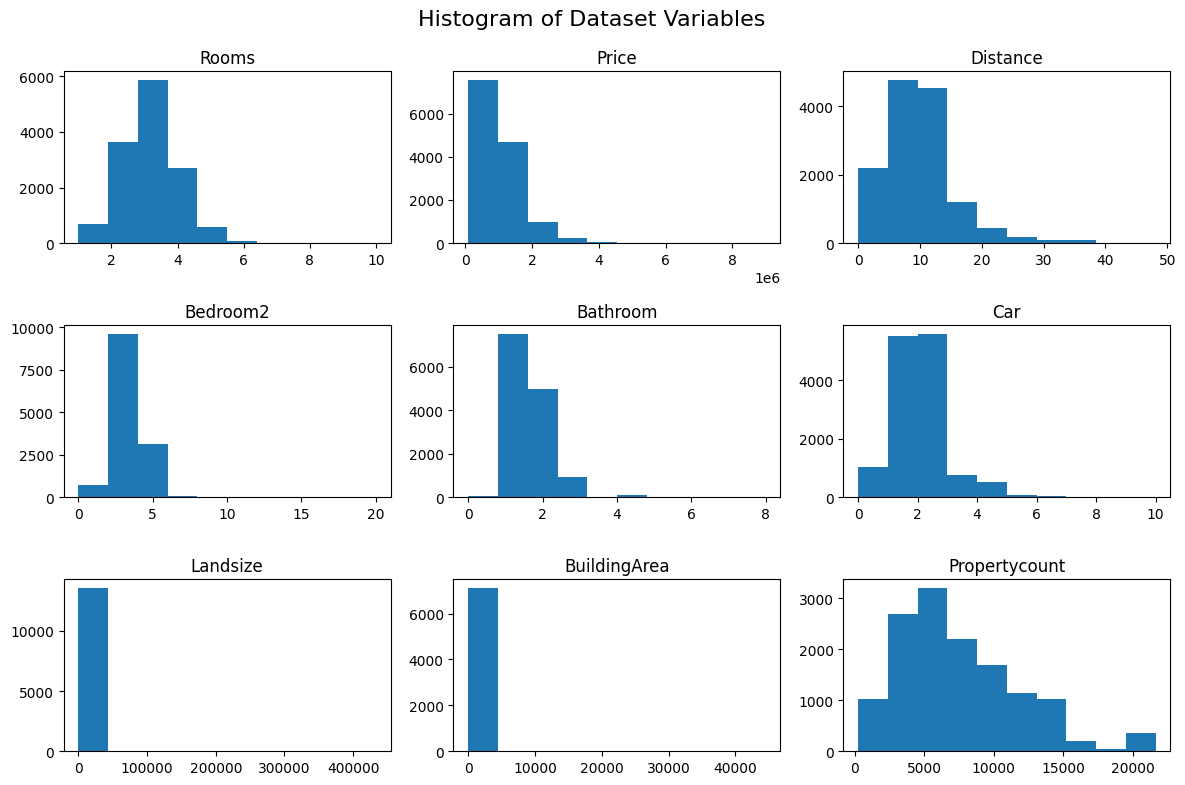

In [17]:
# Visualizing the distribution of Numerical Variables
num_var.hist(figsize=(12,8), grid=False)

# Customize font sizes for different elements
plt.rcParams.update({'font.size': 12})  # Base font size
plt.rcParams.update({'axes.titlesize': 14})  # Subplot titles
plt.rcParams.update({'axes.labelsize': 13})  # Axis labels

plt.suptitle('Histogram of Dataset Variables', fontsize=16)  # Main title
plt.tight_layout()
plt.show()

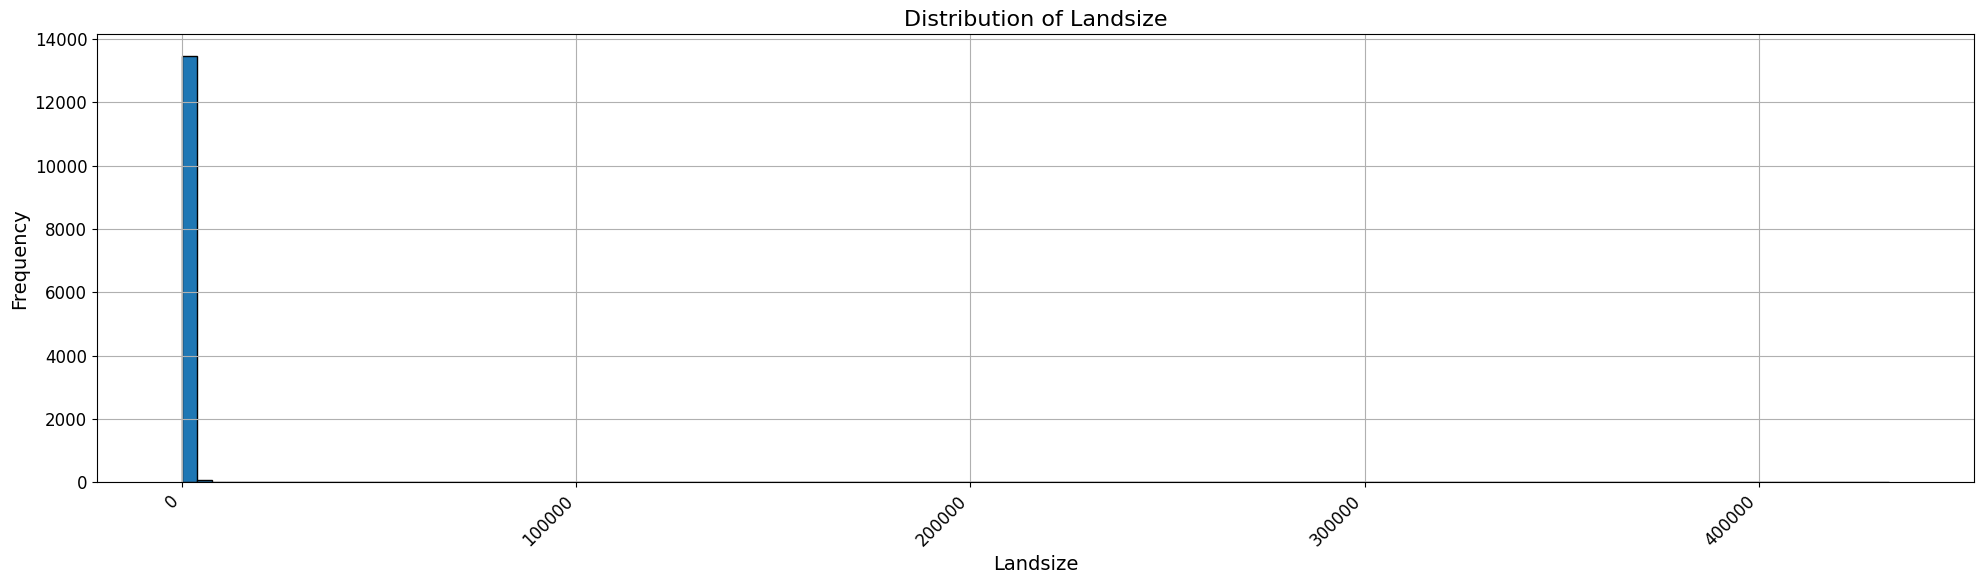

In [18]:
# detailed distribution of the Landsize variable
plt.figure(figsize=(20, 6))  # Increase width, reduce height

# Calculate number of bins based on data range
data_range = dataset['Landsize'].max() - dataset['Landsize'].min()
num_bins = int(np.sqrt(len(dataset['Landsize'])))  # Square root rule
bin_width = data_range / num_bins

dataset['Landsize'].hist(bins=num_bins, edgecolor='black')

plt.title('Distribution of Landsize', fontsize=16)
plt.xlabel('Landsize', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adjust x-axis ticks for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Observation
- The `Rooms` variable is Right skewed showing that most of the properties have less than 5 rooms, and a majority of the properities have between the 2 and 4 rooms.
- The `Price` variable is Right skewed showing that most of the properties cost less than 3 Million Australian Dollars, and a majority of the properities cost between 85,000 and 2 Million Australian Dollars.
- The `Distance` variable is Right skewed showing that most of the properties are within 20 Kilometers from CBD.
- The `Bedrooms2` variable is left skewed showing that most of the properties have less than 6 bedrooms, and a majority of the properities have between the 1 and 5 bedrooms.
- The `Bathrooms` variable is Right skewed showing that most of the properties have less than 3 bathrooms, and a majority of the properities have between the 1 and 3 bathrooms.
- The `landsize` variable is right skewed showing that most of the properties are built on a landsize of less than 1,000 meters, and a majority of the properities are built on a landsize of between 10 meters and 1000 meters.
- The `Propertycount` variable is right skewed showing that majority of the number of properties in suburbs is less than 15,000. and majority of the suburbs have property counts of between 2,000 and 15,000.

#### Distribution of Categorical Variables


**Univariate Analysis of Feature: Suburb**
count         13580
unique          314
top       Reservoir
freq            359
Name: Suburb, dtype: object

Top 20 Values and Counts (including Others):
Reservoir          359
Richmond           260
Bentleigh East     249
Preston            239
Brunswick          222
Essendon           220
South Yarra        202
Glen Iris          195
Hawthorn           191
Coburg             190
Northcote          188
Brighton           186
Kew                177
Balwyn North       171
Pascoe Vale        171
Yarraville         164
St Kilda           162
Glenroy            159
Port Melbourne     153
Moonee Ponds       149
Others            9573
dtype: int64


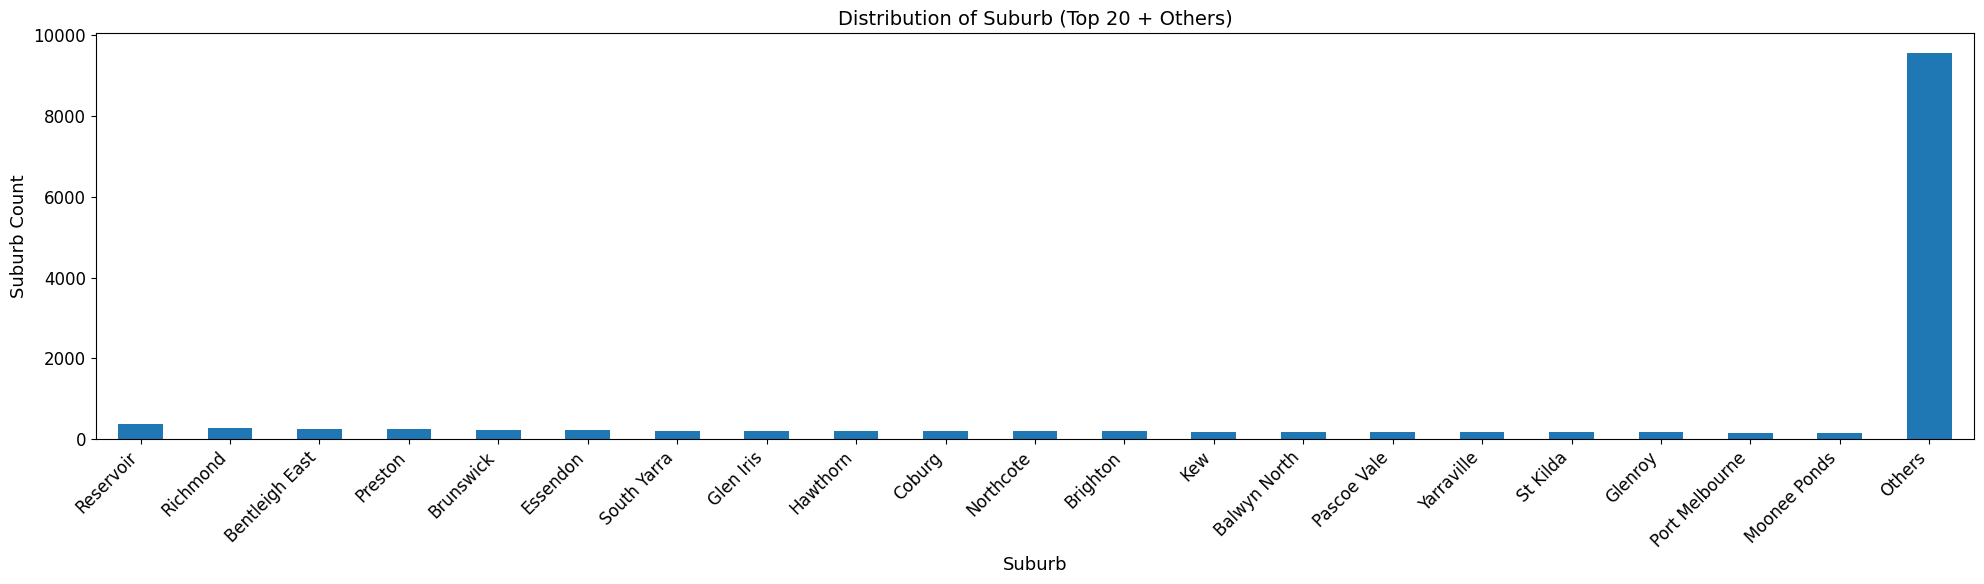


**Univariate Analysis of Feature: Type**
count     13580
unique        3
top           h
freq       9449
Name: Type, dtype: object

Top 20 Values and Counts (including Others):
h         9449
u         3017
t         1114
Others       0
dtype: int64


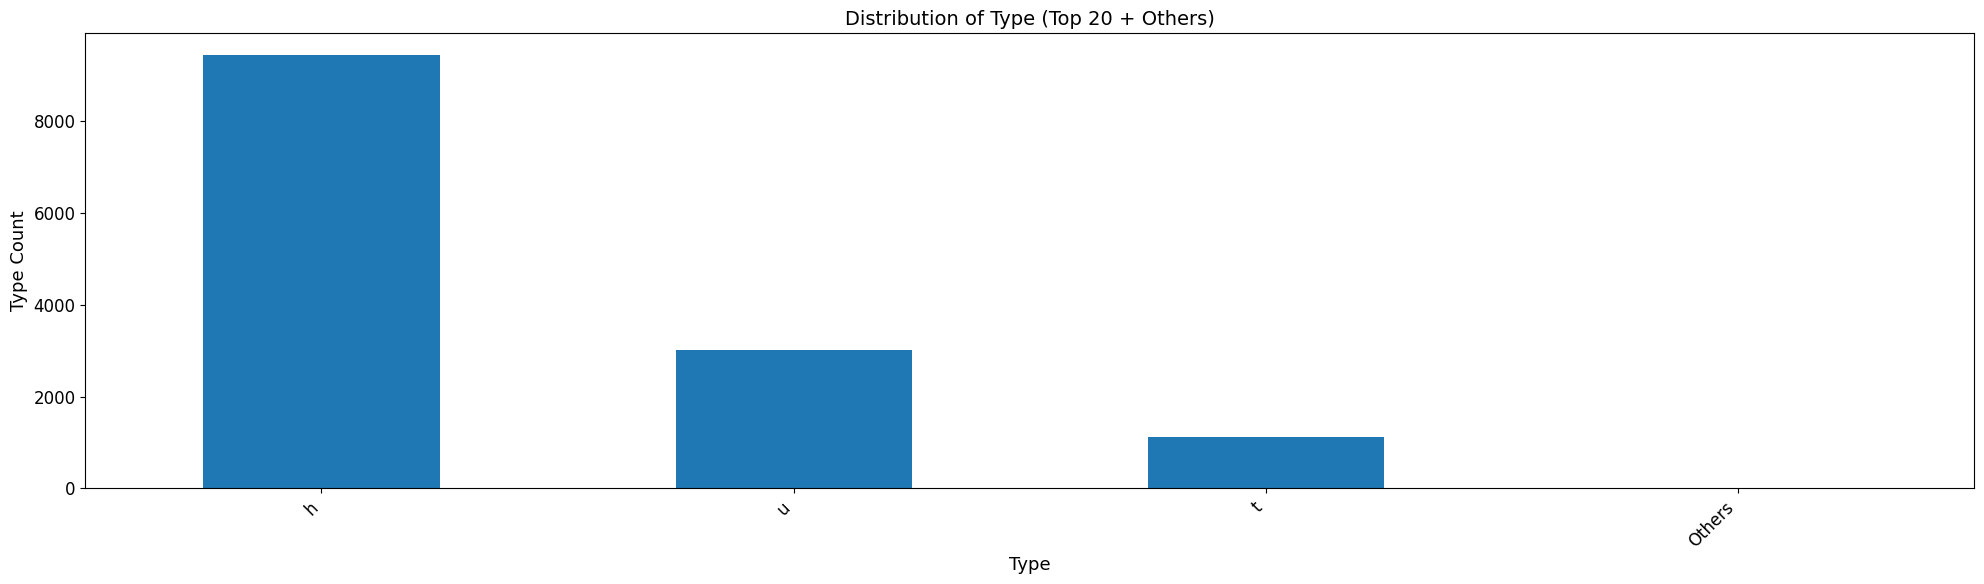


**Univariate Analysis of Feature: Method**
count     13580
unique        5
top           S
freq       9022
Name: Method, dtype: object

Top 20 Values and Counts (including Others):
S         9022
SP        1703
PI        1564
VB        1199
SA          92
Others       0
dtype: int64


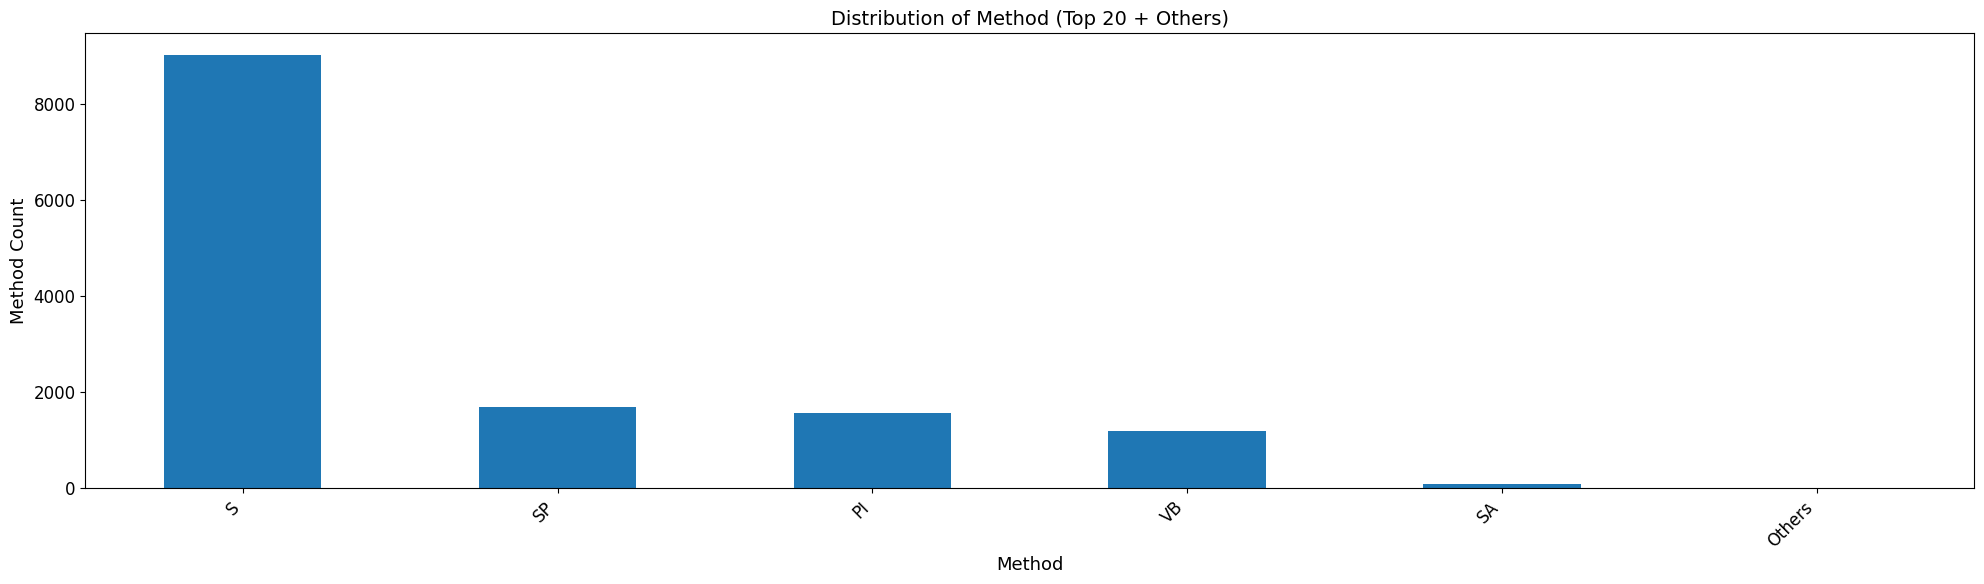


**Univariate Analysis of Feature: SellerG**
count      13580
unique       268
top       Nelson
freq        1565
Name: SellerG, dtype: object

Top 20 Values and Counts (including Others):
Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
Marshall          659
Buxton            632
Biggin            393
Brad              342
Fletchers         301
Woodards          301
Jas               243
Greg              239
McGrath           222
Sweeney           216
Noel              205
Miles             196
RT                184
Gary              170
Harcourts         168
Others           3349
dtype: int64


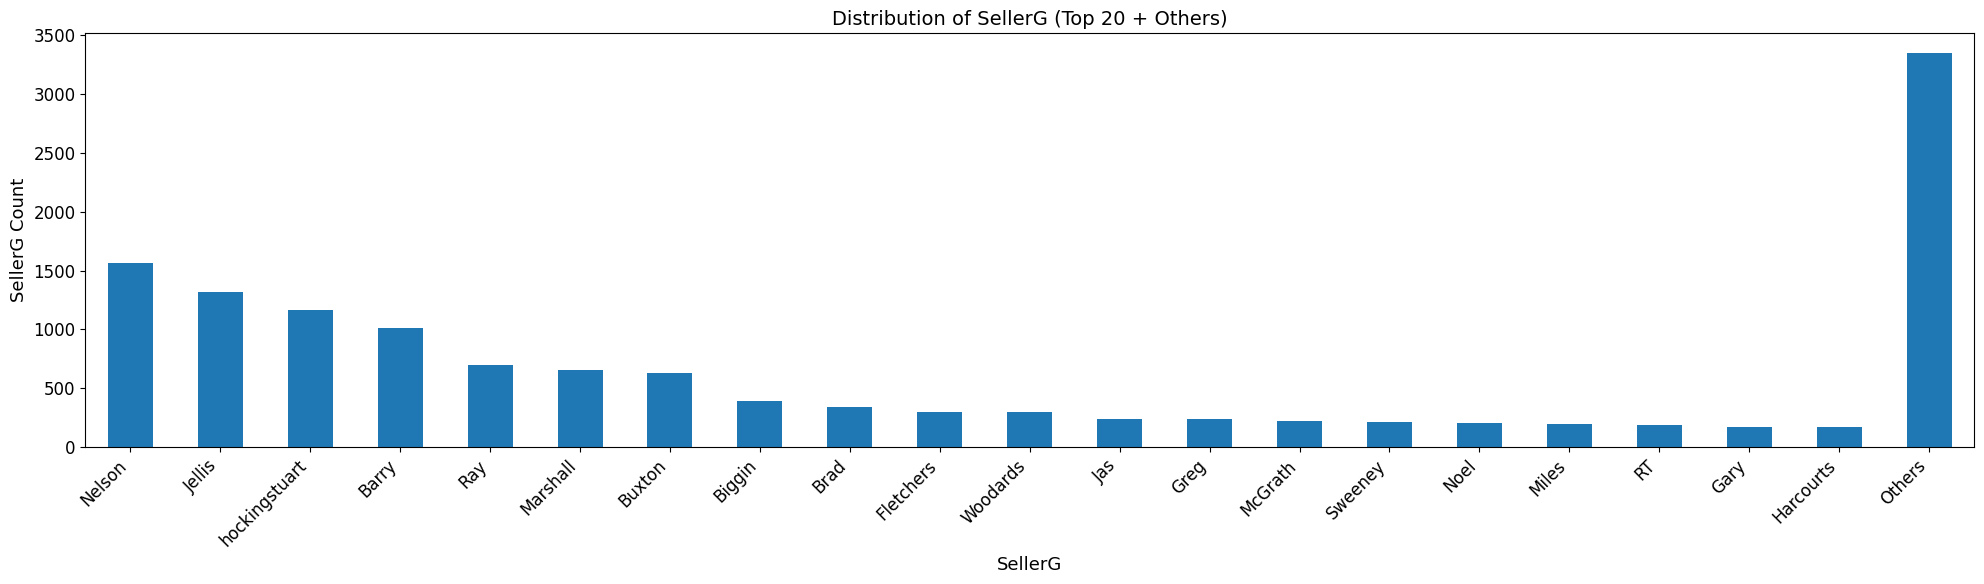


**Univariate Analysis of Feature: CouncilArea**
count       13580
unique         34
top       Unknown
freq         1369
Name: CouncilArea, dtype: object

Top 20 Values and Counts (including Others):
Unknown          1369
Moreland         1163
Boroondara       1160
Moonee Valley     997
Darebin           934
Glen Eira         848
Stonnington       719
Maribyrnong       692
Yarra             647
Port Phillip      628
Banyule           594
Bayside           489
Melbourne         470
Hobsons Bay       434
Brimbank          424
Monash            333
Manningham        311
Whitehorse        304
Kingston          207
Whittlesea        167
Others            690
dtype: int64


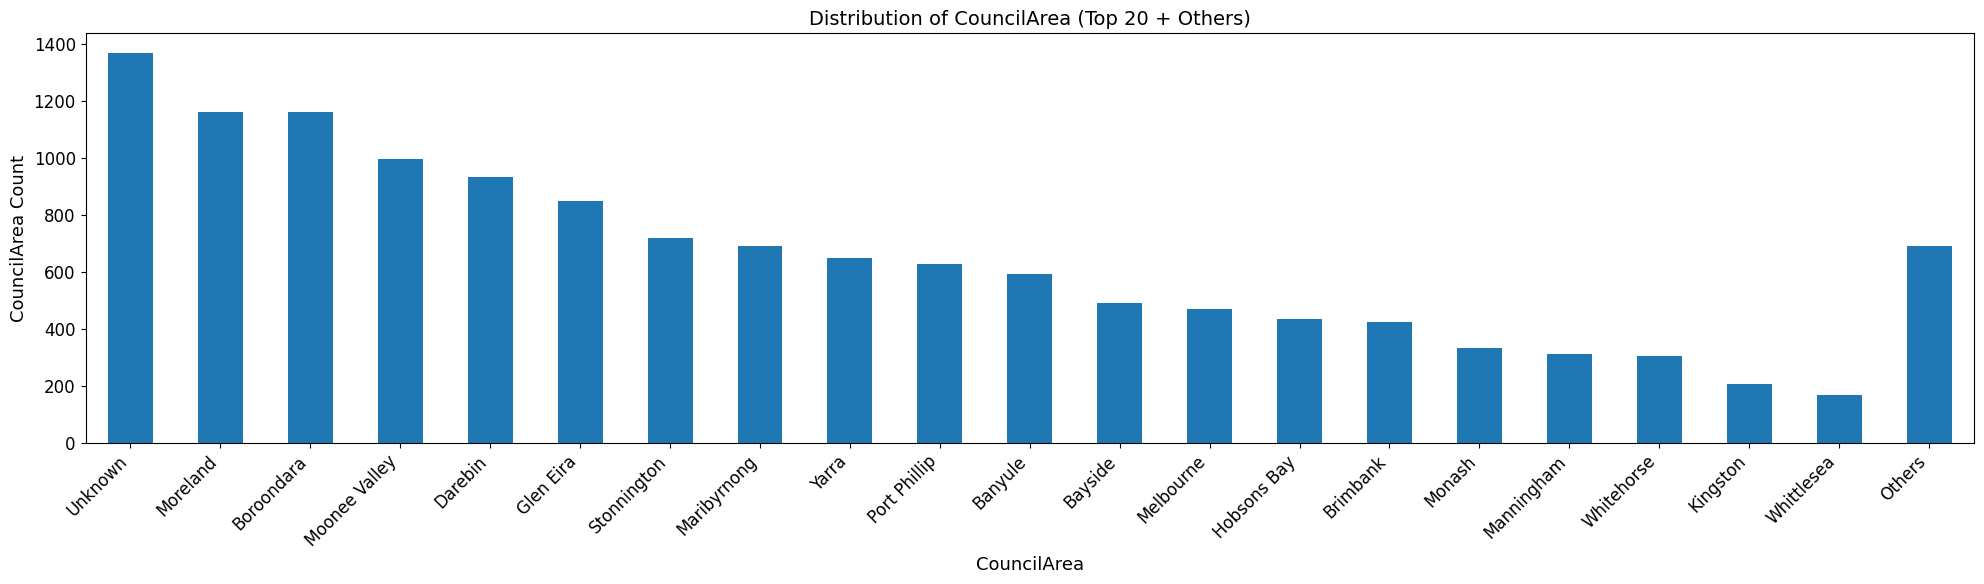


**Univariate Analysis of Feature: Regionname**
count                     13580
unique                        8
top       Southern Metropolitan
freq                       4695
Name: Regionname, dtype: object

Top 20 Values and Counts (including Others):
Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Others                           0
dtype: int64


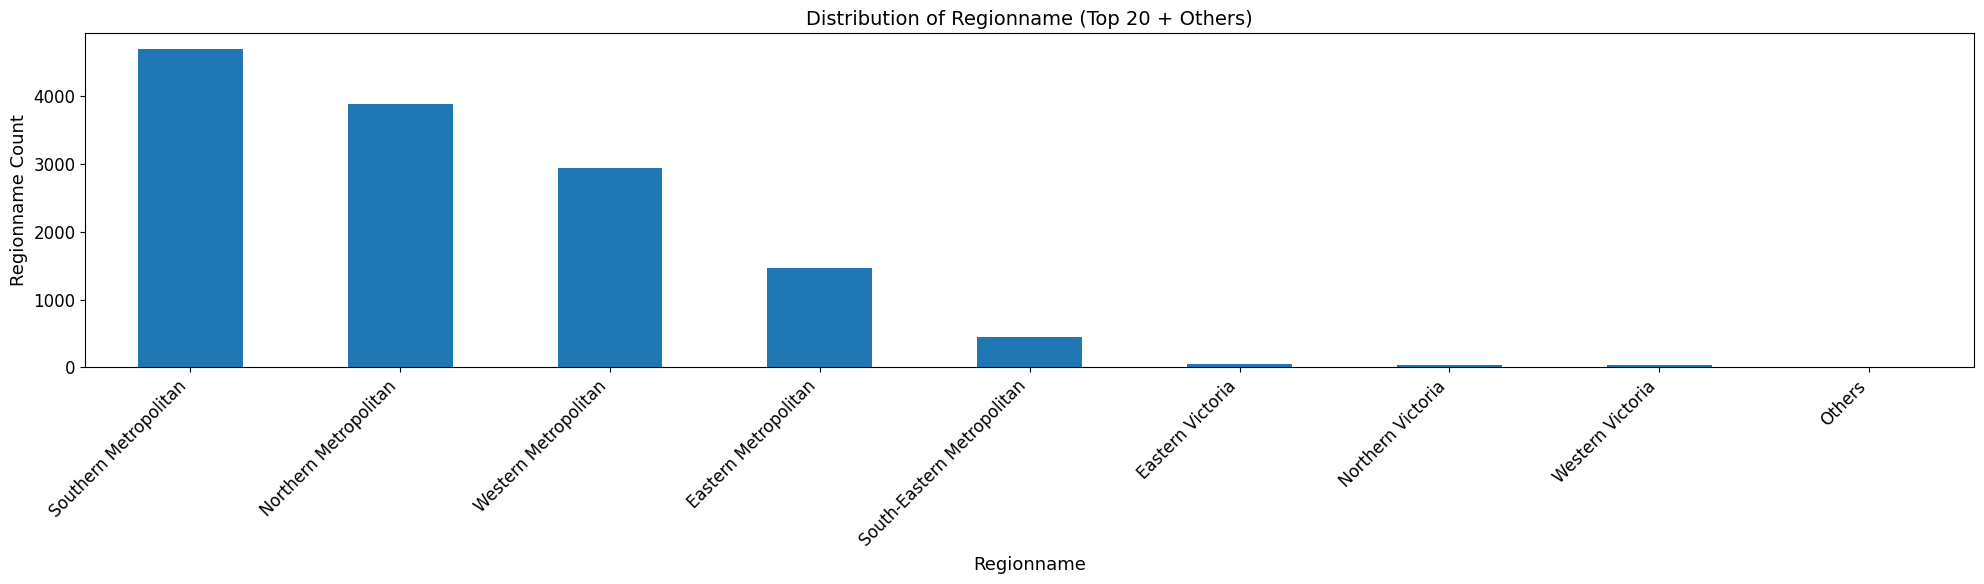

In [19]:
# List of categorical variables
cat_vars = dataset[['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']]

# Loop through each categorical variable
for feature in cat_vars:
    # Describe the feature
    plt.figure(figsize=(20,6))
    print(f"\n**Univariate Analysis of Feature: {feature}**")
    print(dataset[feature].describe())
    
    # Get value counts
    value_counts = dataset[feature].value_counts()
    
    # Separate top 20 categories and sum up the rest
    top_20 = value_counts.nlargest(20)
    others = pd.Series({'Others': value_counts.nsmallest(len(value_counts) - 20).sum()})
    
    # Combine top 20 and others
    plot_data = pd.concat([top_20, others])
    
    # Print the number of unique values and their corresponding counts
    print("\nTop 20 Values and Counts (including Others):")
    print(plot_data)
    
    # Plot the distribution of the variable
    plot_data.plot(kind="bar")
    plt.xlabel(feature)
    plt.ylabel(f"{feature} Count")
    plt.title(f"Distribution of {feature} (Top 20 + Others)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### Observation
- `314` unique `Suburb`s were listed and the `Reservoir` suburb had the most number of properities, `359`, for display purposes, all the other suburbs not in the top 20 are aggregated into the other category. 

- `3` property `Type`s were listed in this dataset and the `h-(house,cottage,villa, semi,terrace)` properity type sold the most `9,449`, while the `t-(townhouse)`property type sold the least, `1,114`. 

- There were `5` unique property sale `Method`s used and the `s-(Property Sold)` method was the most utilized with `9,022` entries, while `SA-(Sold After Auction)`method had the least entries, `92`.

- There were `268` unique `SellerG-Real Estate Agent`s and `Nelson` was the top agent with most sales, `1,565`, for display purposes, all the other agents not in the top 20 are aggregated into the other category and they had `3,349`property sales.

- There were `21` unique Governing Councils `CouncilArea`s captured and `Moreland` Council had the most properity sold, `1,163`,  while `Kingston`Council had the least, `207`. All the properity without a recorded Council area were marked `Unknown`and they were, `1,369`.

- There were `8` unique general regions, `Regionname`s captured and `Southern Metropolitan` region had the most properity sold, `4,695`,  while `Western Victoria` region had the least, `32`. 

### Bivariate and Multivariate Data Analysis

#### Bivariate and Multivariate analysis on numerical variables

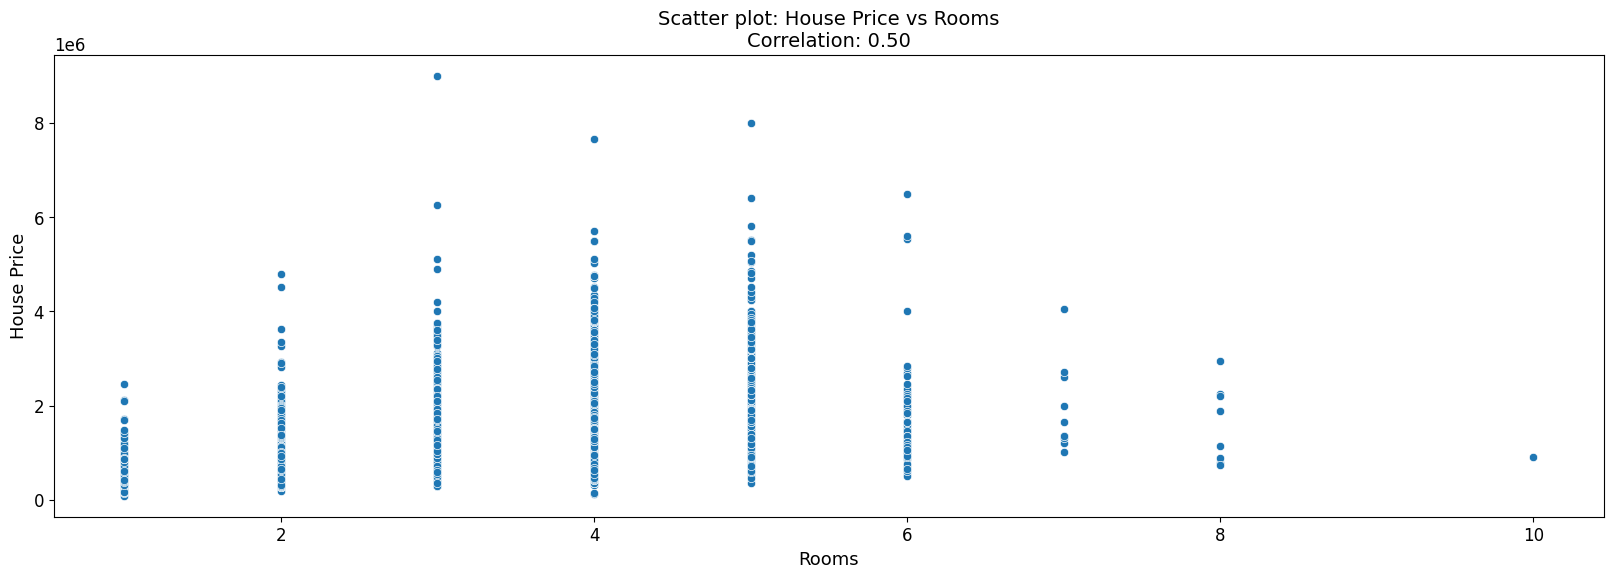

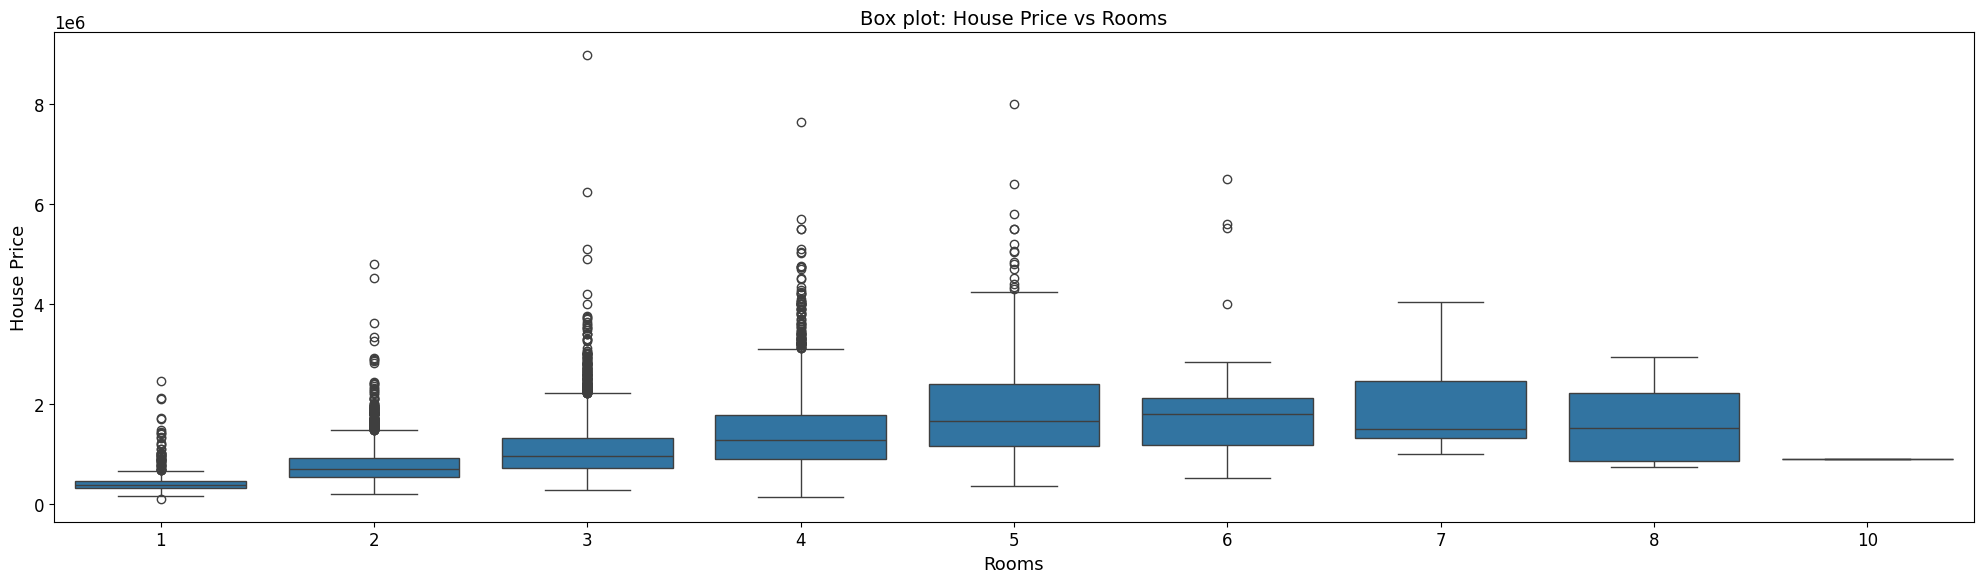

Correlation between House Price and Rooms: 0.50
------------------------------------------------------------------------------------------------------------------------------------------------------


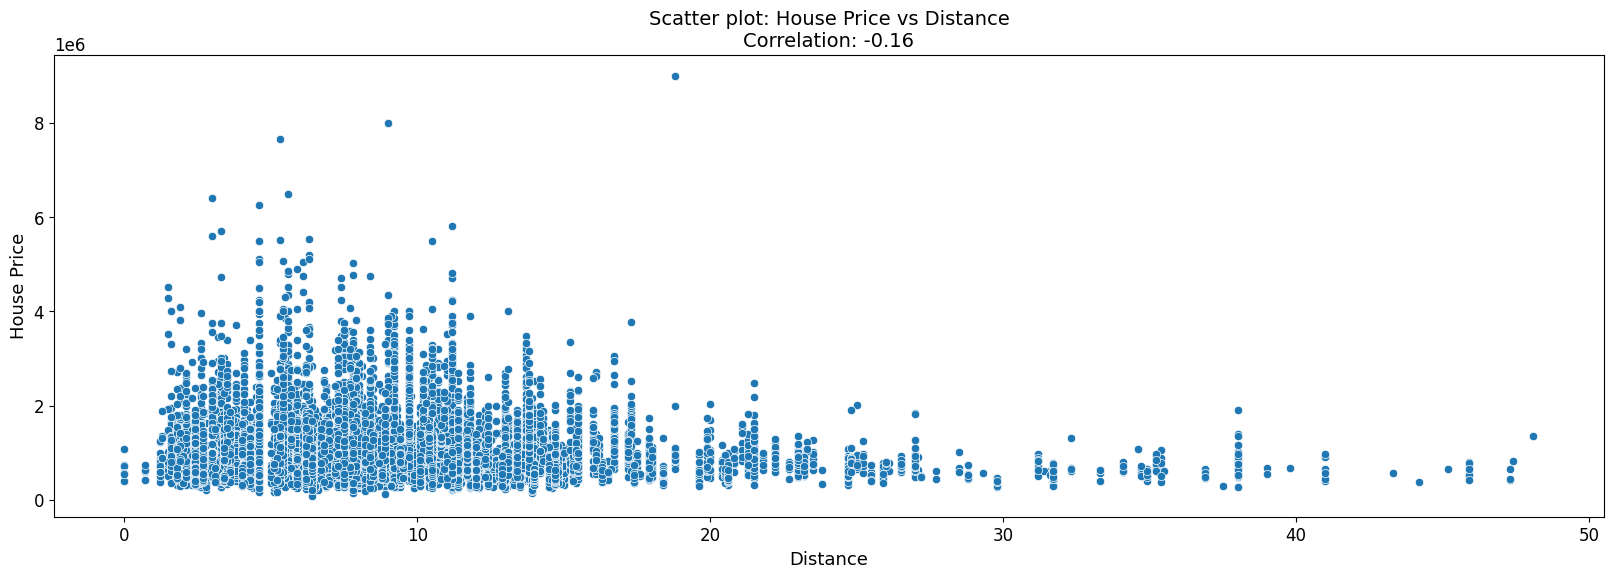

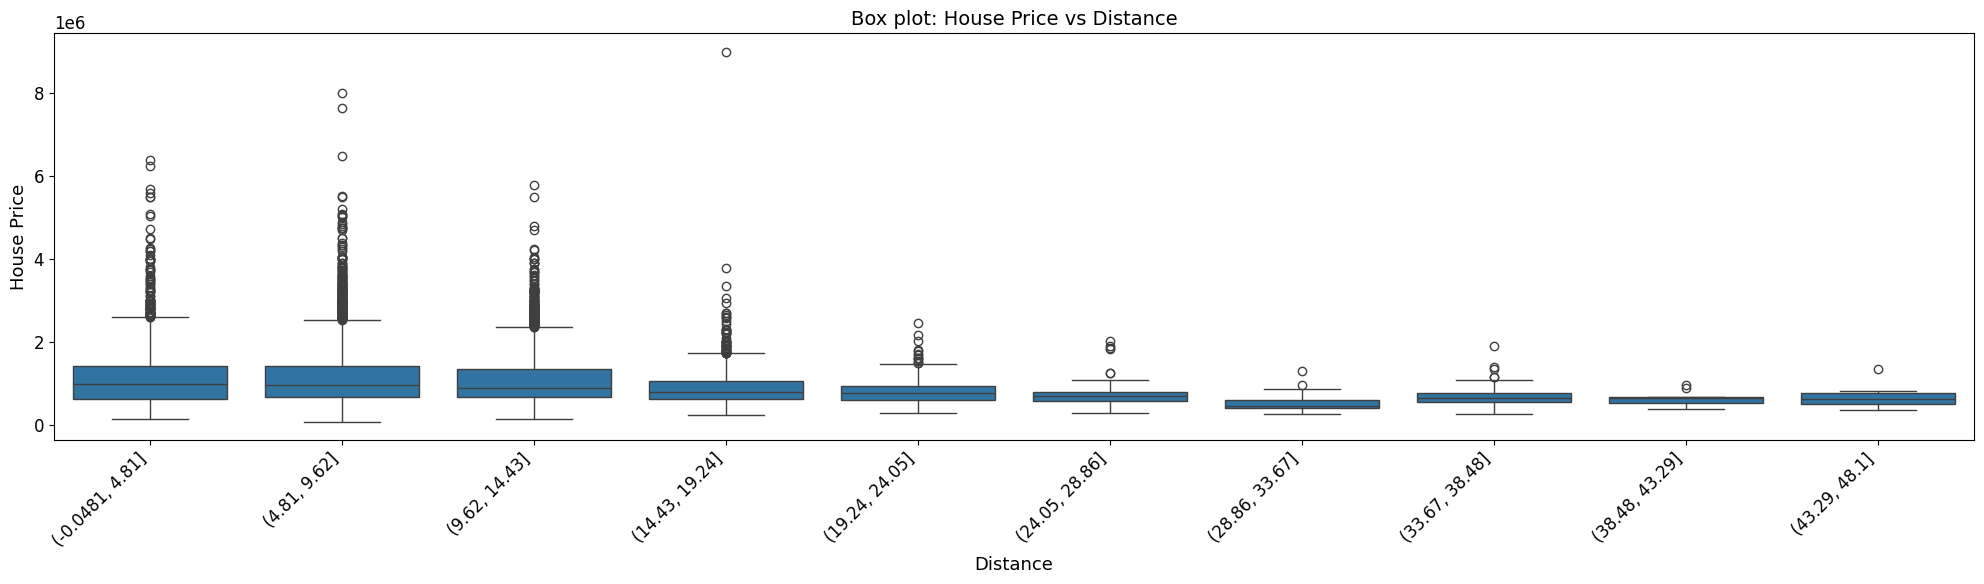

Correlation between House Price and Distance: -0.16
------------------------------------------------------------------------------------------------------------------------------------------------------


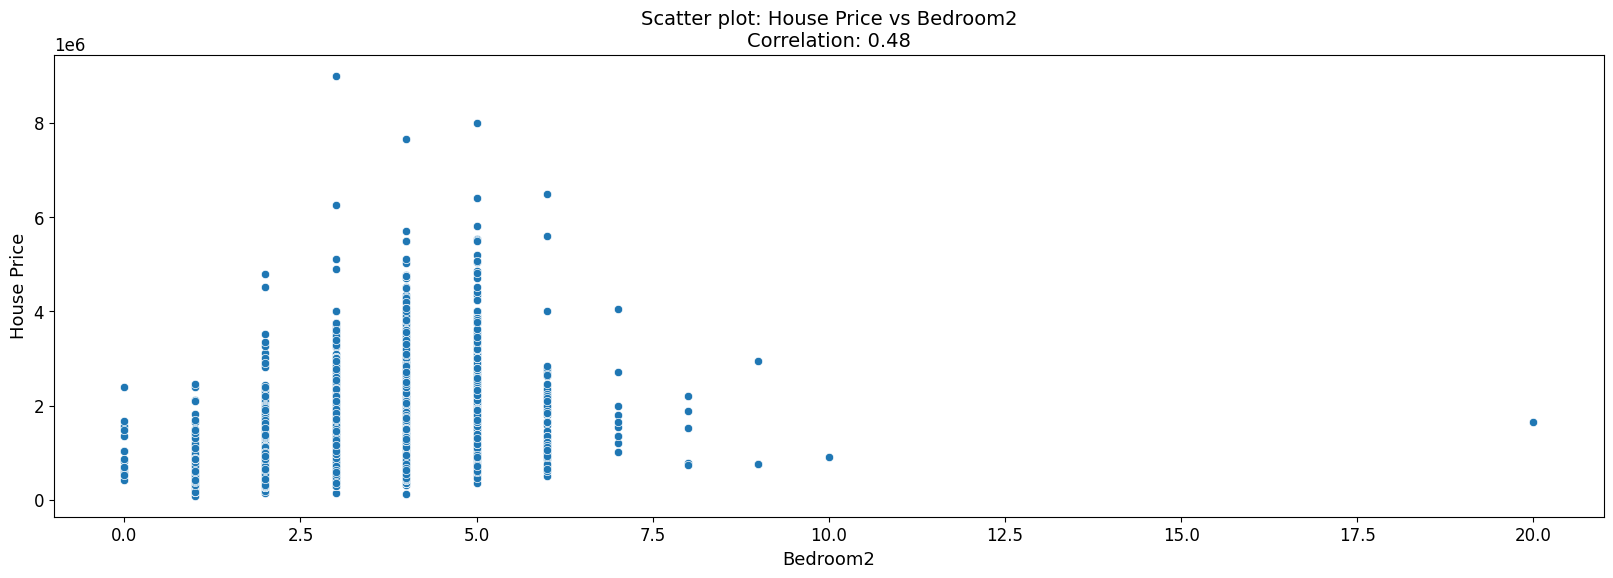

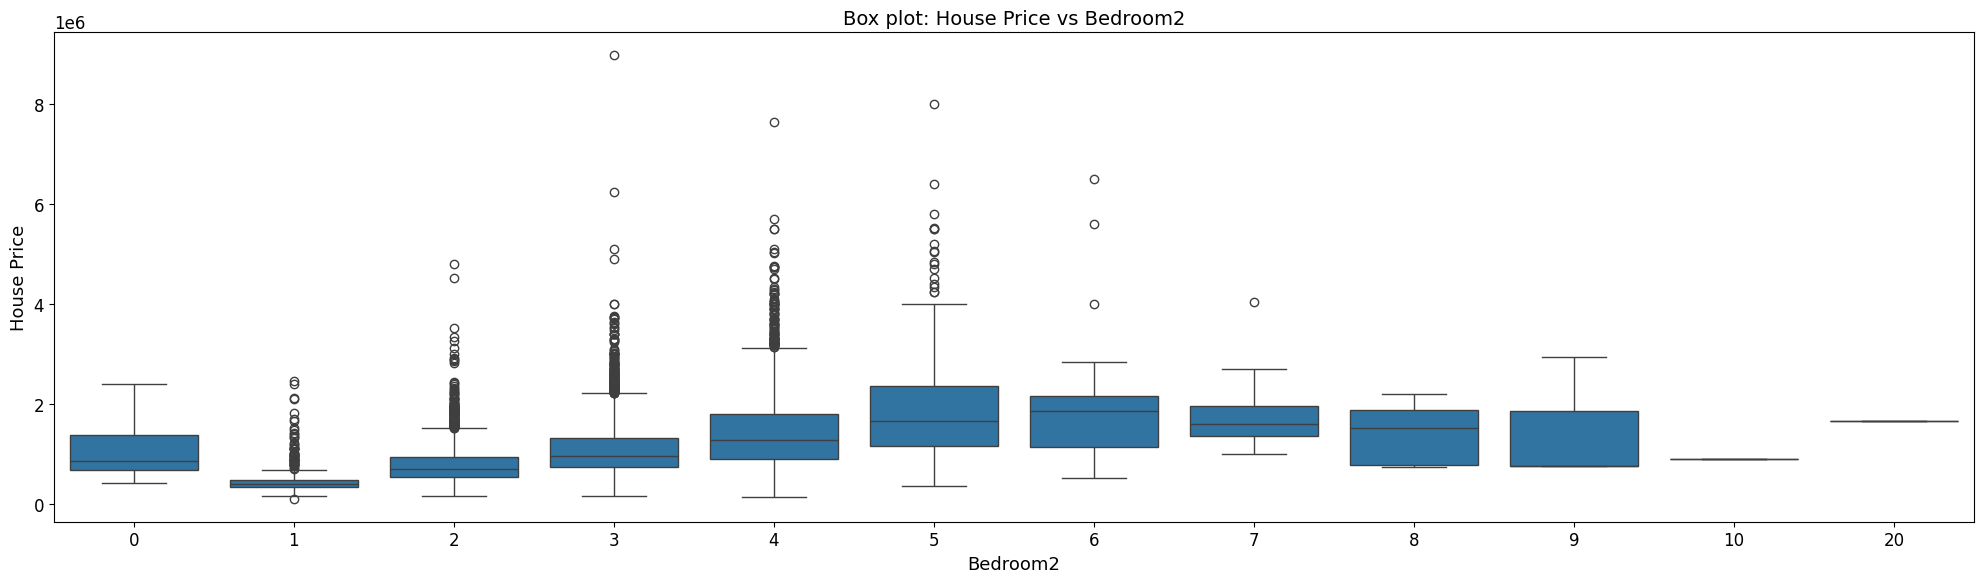

Correlation between House Price and Bedroom2: 0.48
------------------------------------------------------------------------------------------------------------------------------------------------------


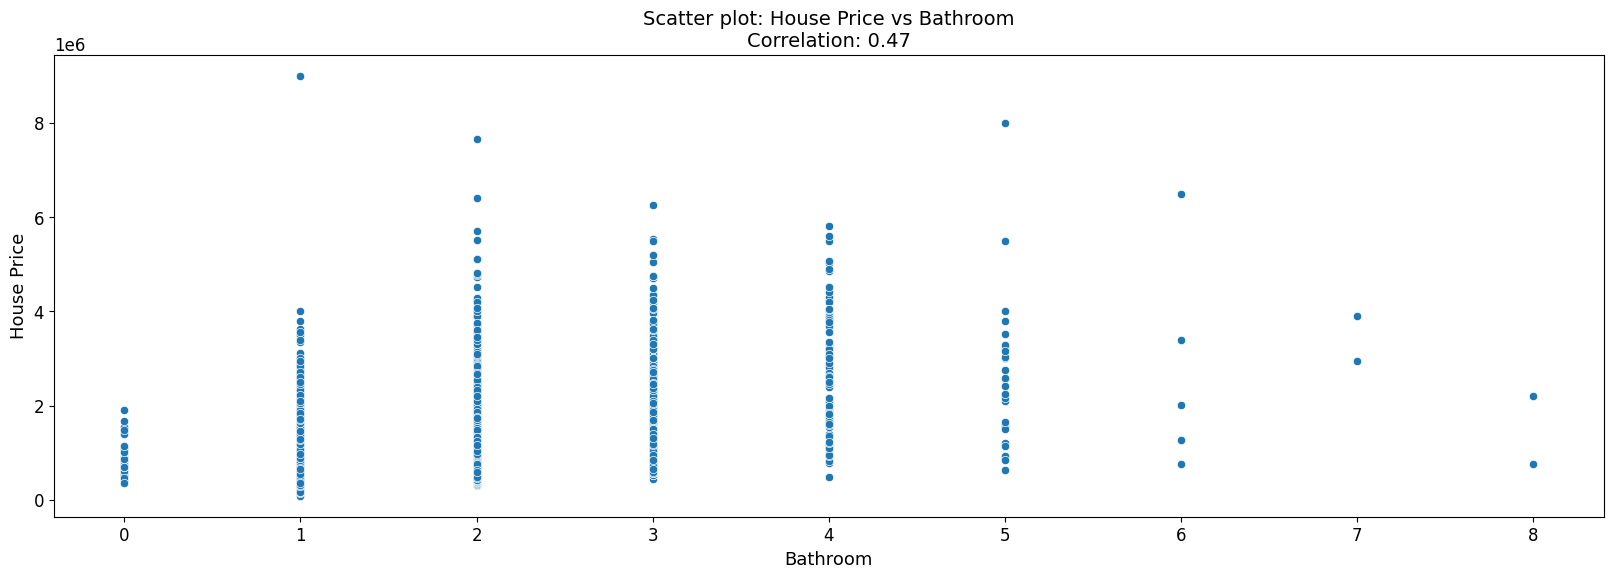

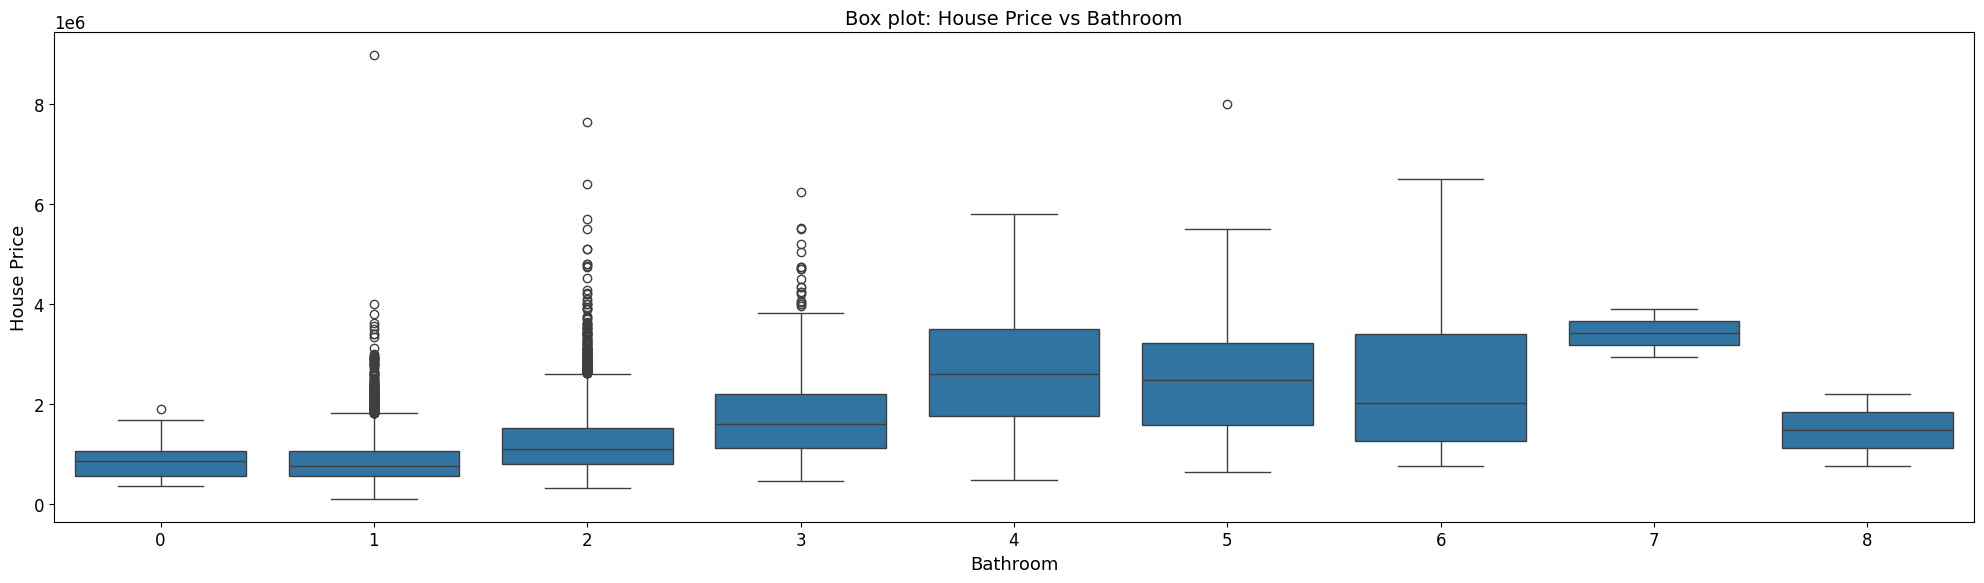

Correlation between House Price and Bathroom: 0.47
------------------------------------------------------------------------------------------------------------------------------------------------------


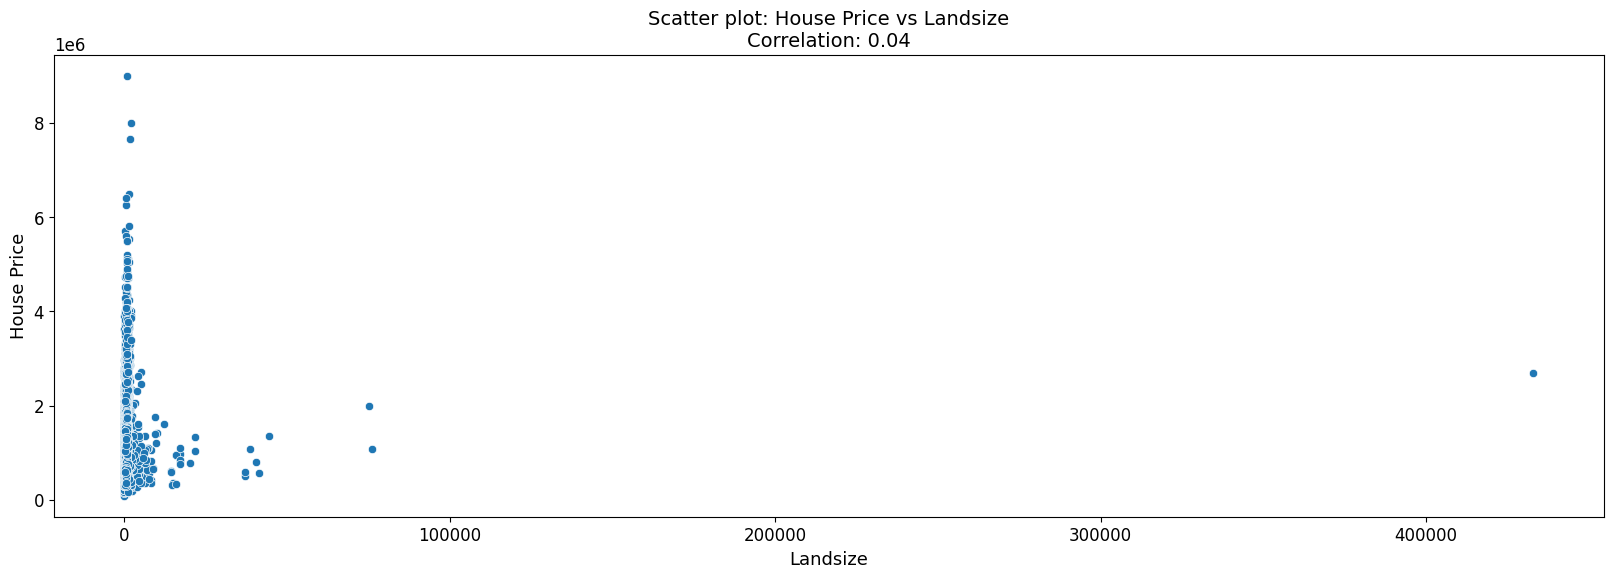

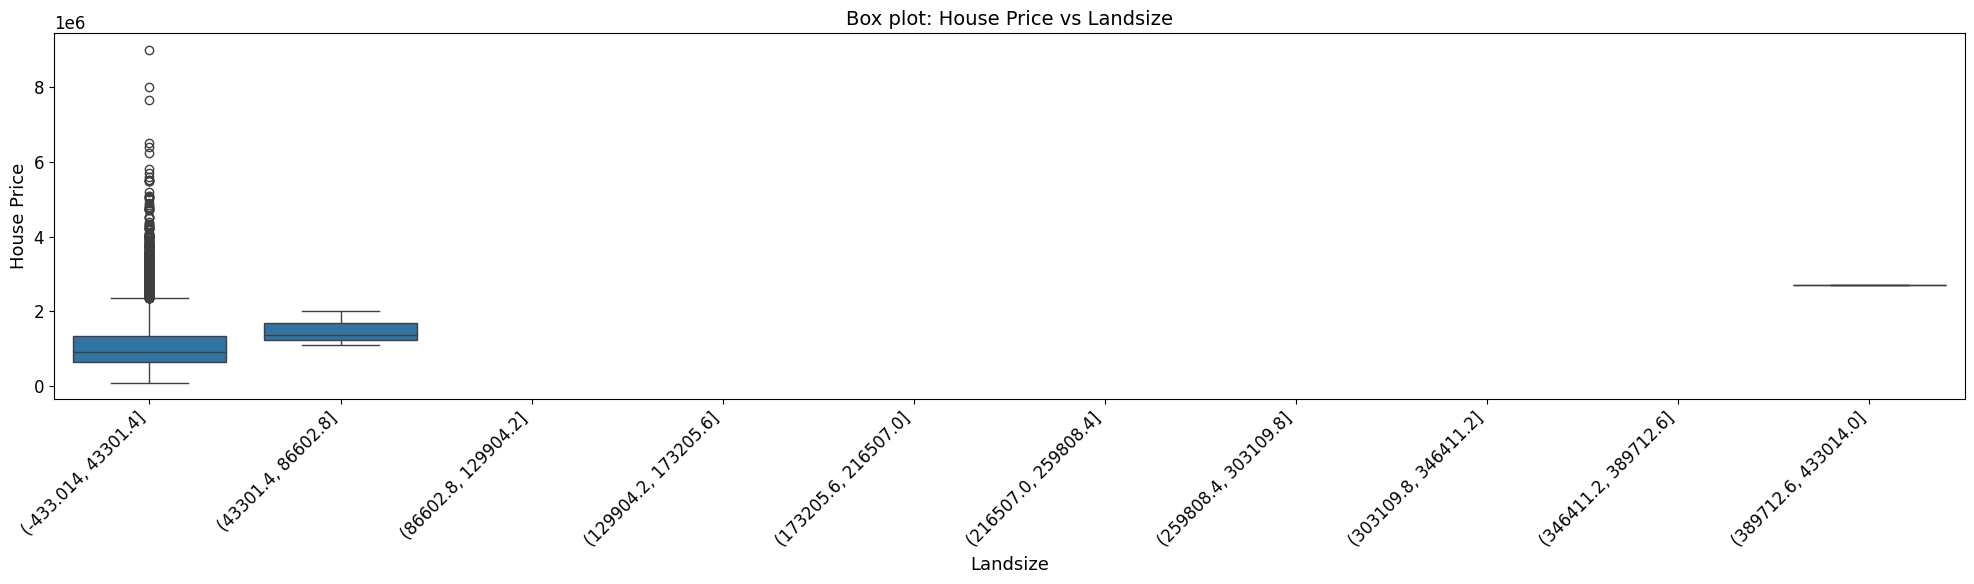

Correlation between House Price and Landsize: 0.04
------------------------------------------------------------------------------------------------------------------------------------------------------


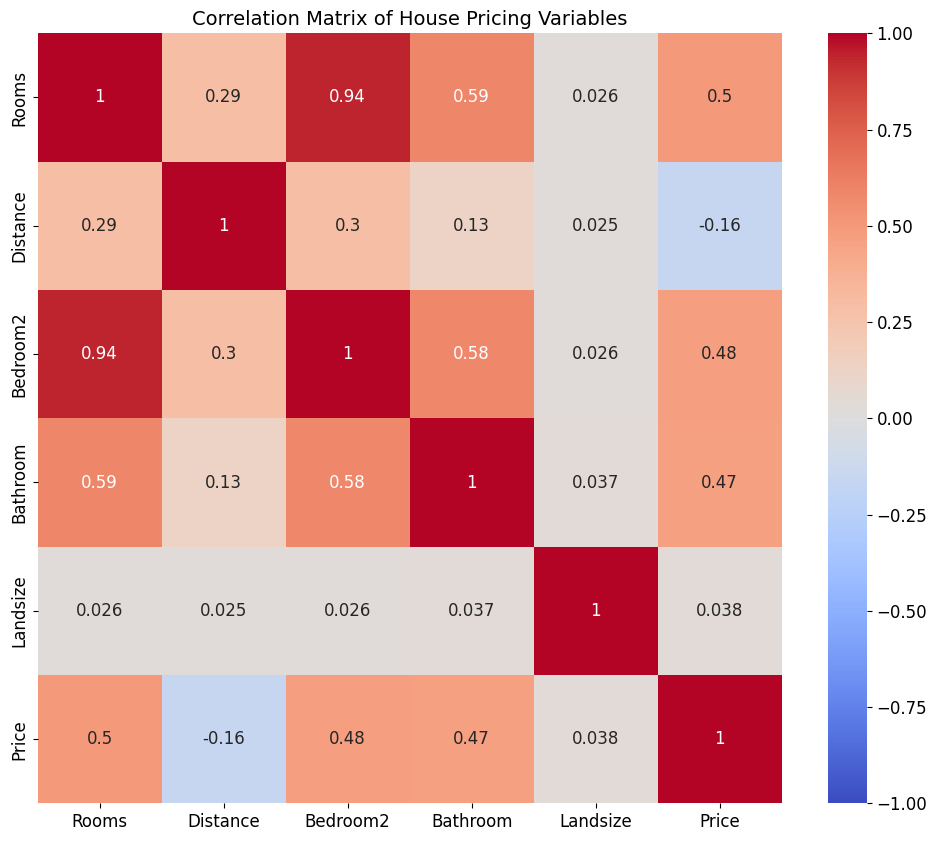

Correlation Matrix:
             Rooms  Distance  Bedroom2  Bathroom  Landsize     Price
Rooms     1.000000  0.294203  0.944190  0.592934  0.025678  0.496634
Distance  0.294203  1.000000  0.295927  0.127155  0.025004 -0.162522
Bedroom2  0.944190  0.295927  1.000000  0.584685  0.025646  0.475951
Bathroom  0.592934  0.127155  0.584685  1.000000  0.037130  0.467038
Landsize  0.025678  0.025004  0.025646  0.037130  1.000000  0.037507
Price     0.496634 -0.162522  0.475951  0.467038  0.037507  1.000000


In [20]:
# List of numerical variables to analyze
numvariables = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize']

# Create a function for bivariate analysis
def bivariate_analysis(x, y):
    # Calculate correlation coefficient
    correlation = stats.pearsonr(x, y)[0]
    
    # Create scatter plot
    plt.figure(figsize=(20, 6))
    sns.scatterplot(x=x, y=y)
    plt.title(f'Scatter plot: House Price vs {x.name}\nCorrelation: {correlation:.2f}')
    plt.xlabel(x.name)
    plt.ylabel('House Price')
    plt.show()
    
    # Create box plot
    plt.figure(figsize=(20, 6))
    if x.name in ['Landsize', 'Distance']:
        # Create bins for Landsize and Distance
        bins = pd.cut(x, bins=10)
        sns.boxplot(x=bins, y=y)
        plt.xticks(rotation=45, ha='right')
    else:
        sns.boxplot(x=x, y=y)
    plt.title(f'Box plot: House Price vs {x.name}')
    plt.xlabel(x.name)
    plt.ylabel('House Price')
    plt.tight_layout()
    plt.show()
    
    print(f"Correlation between House Price and {x.name}: {correlation:.2f}")
    print("---"*50)

# Perform bivariate analysis for each variable
for var in numvariables:
    bivariate_analysis(dataset[var], dataset['Price'])

# Create a correlation matrix
correlation_matrix = dataset[numvariables + ['Price']].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of House Pricing Variables')
plt.show()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

#### Observation
__Rooms and Price:__
`Correlation: 0.497`
- This indicates a moderate positive correlation between the number of rooms and the price of a house. As the number of rooms increases, there's a tendency for the price to increase as well.

__Distance and Price:__
`Correlation: -0.163`
- There's a weak negative correlation between distance (presumably from the city center or CBD) and price. This suggests that houses farther from the center tend to be slightly cheaper, but the relationship isn't very strong.

__Bedroom2 and Price:__
`Correlation: 0.476`
- Similar to the number of rooms, there's a moderate positive correlation between the number of bedrooms and price. More bedrooms generally correspond to higher prices.

__Bathroom and Price:__
`Correlation: 0.467`
- Another moderate positive correlation, indicating that houses with more bathrooms tend to be more expensive.

__Landsize and Price:__
`Correlation: 0.038`
- There's a very weak positive correlation between land size and price. This suggests that the size of the land doesn't have much impact on the price in this dataset.

__Rooms and Bedroom2:__
`Correlation: 0.944`
- This very strong positive correlation indicates that these two variables are almost measuring the same thing. It's likely that "Rooms" includes bedrooms, which explains the high correlation.

__Rooms and Bathroom:__
`Correlation: 0.593`
- A moderately strong positive correlation, suggesting that houses with more rooms tend to have more bathrooms.

__Bedroom2 and Bathroom:__
`Correlation: 0.585`
- Similar to the rooms-bathroom correlation, indicating a moderately strong positive relationship between the number of bedrooms and bathrooms.

__Distance and other variables:__

- Generally weak correlations, suggesting that the distance doesn't strongly relate to other house features in this dataset.

__Landsize and other variables:__

- Very weak correlations across the board, indicating that land size doesn't have strong relationships with other features in this dataset.

#### Bivariate and Multivariate analysis on Categorical variables


Bivariate Analysis for Suburb


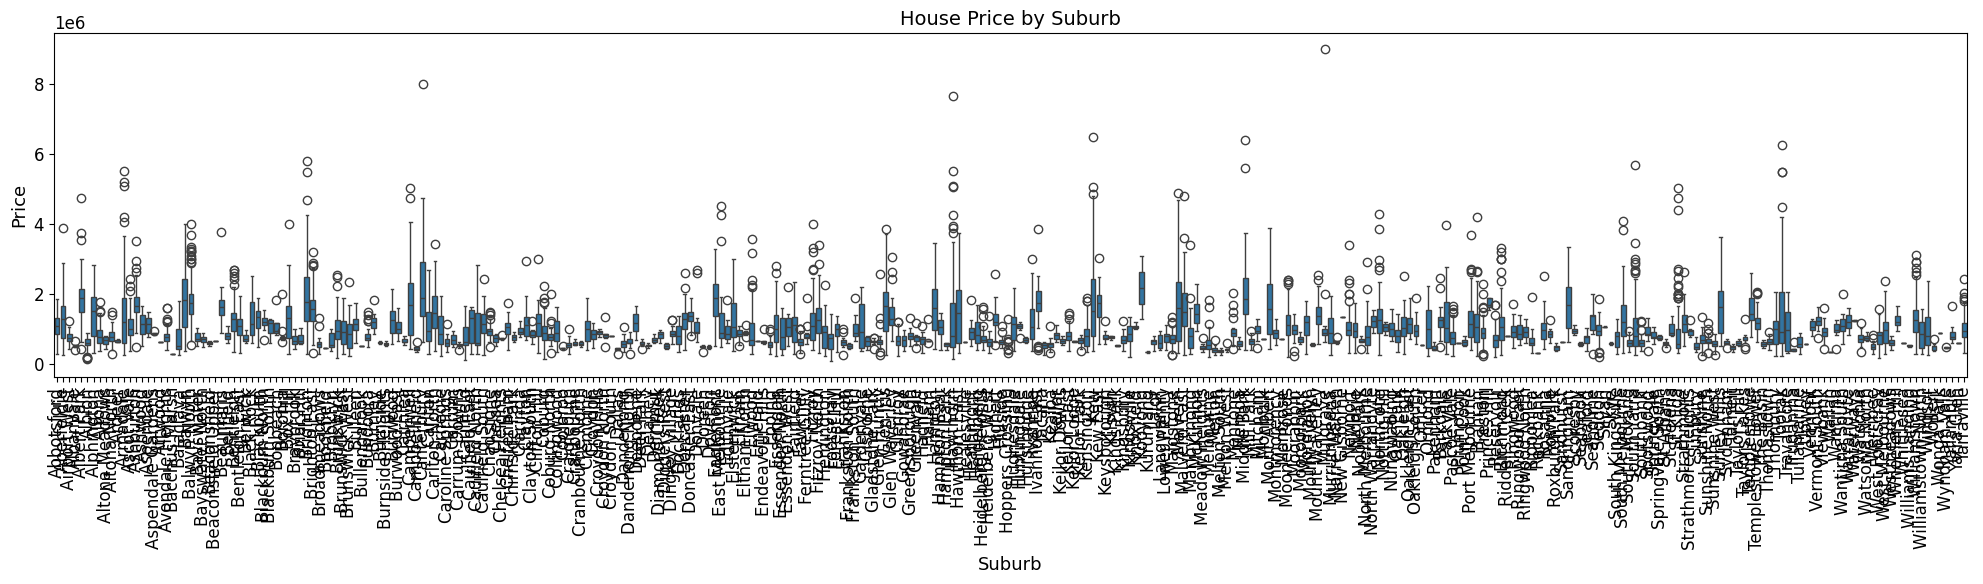

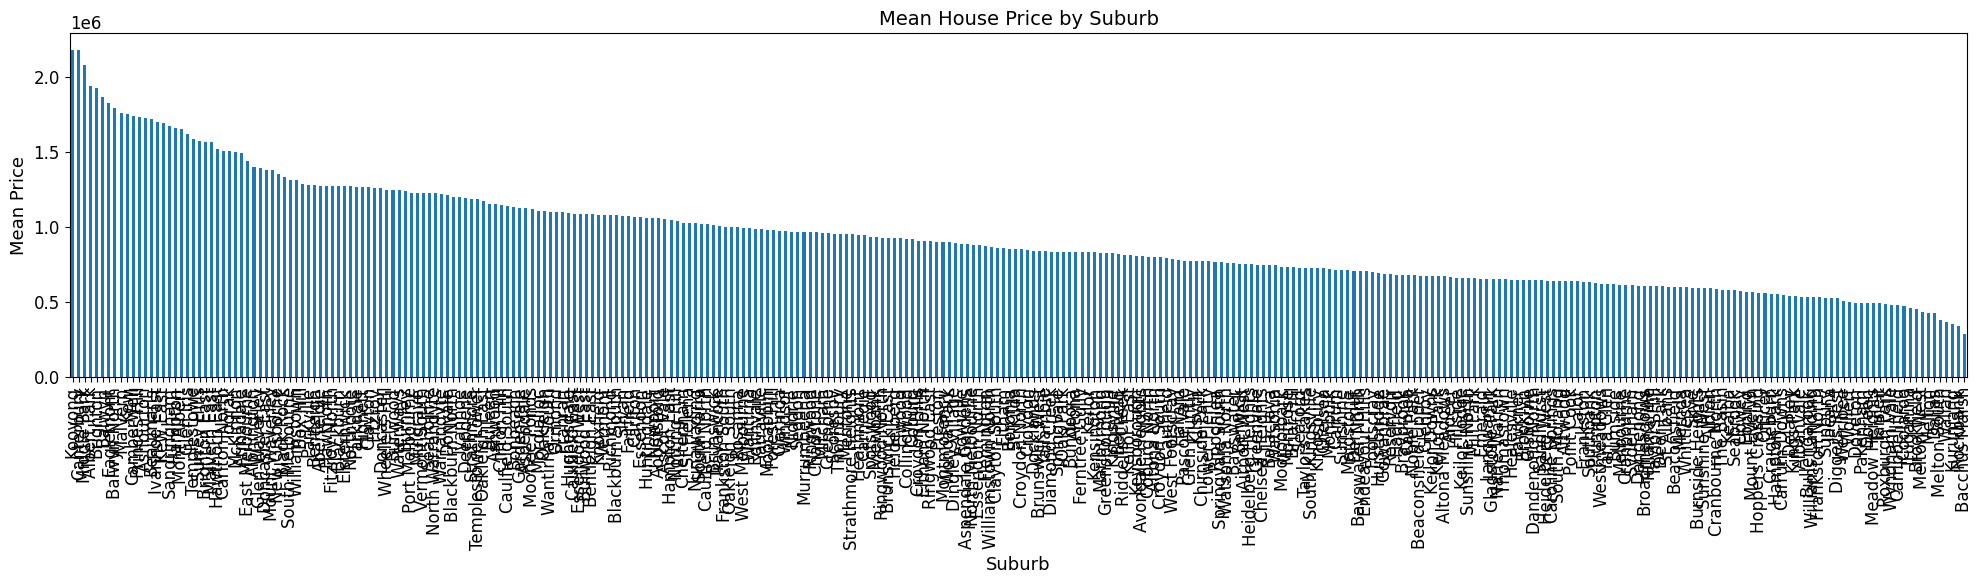

ANOVA test for Suburb:
F-statistic: 19.32830870108238
p-value: 0.0
Effect size (Eta-squared): 0.31320333386704324

Top 5 categories by mean price:
Suburb
Kooyong        2.185000e+06
Canterbury     2.180241e+06
Middle Park    2.082529e+06
Albert Park    1.941355e+06
Brighton       1.930158e+06
Name: Price, dtype: float64

Bottom 5 categories by mean price:
Suburb
Melton South     380736.111111
Wallan           366000.000000
Kurunjang        353000.000000
Rockbank         340000.000000
Bacchus Marsh    285000.000000
Name: Price, dtype: float64

---

Bivariate Analysis for Type


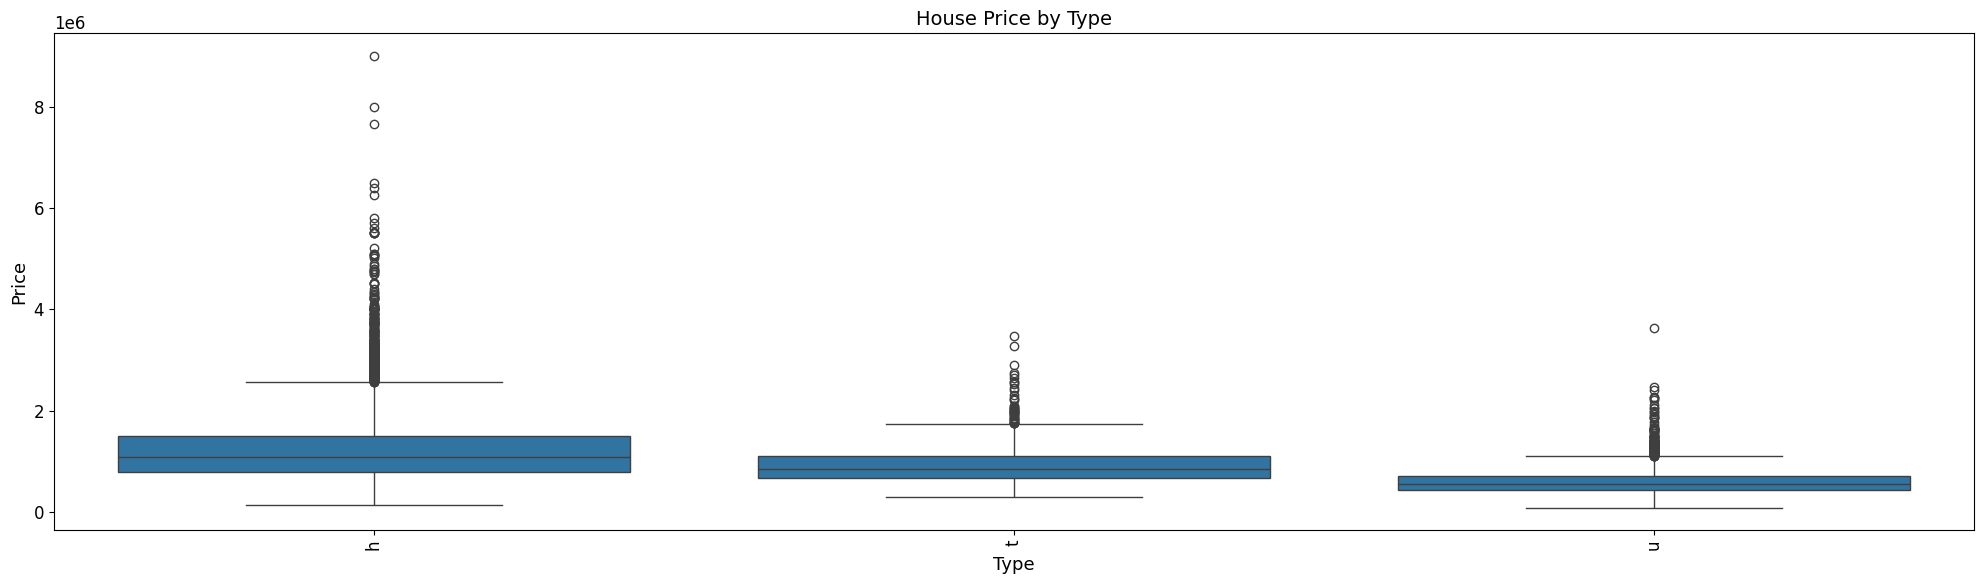

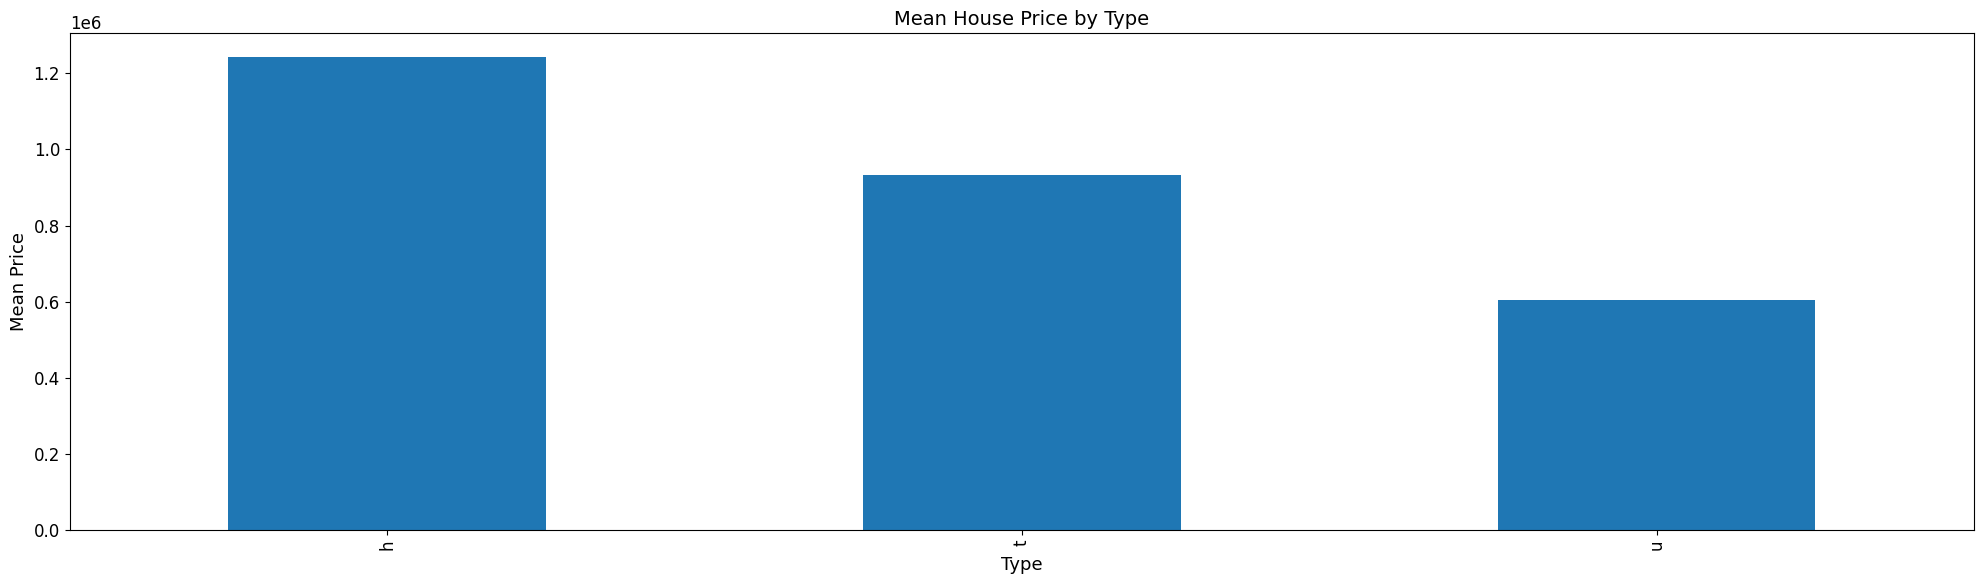

ANOVA test for Type:
F-statistic: 1409.0051533559567
p-value: 0.0
Effect size (Eta-squared): 0.1718821918372479

Top 5 categories by mean price:
Type
h    1.242665e+06
t    9.337351e+05
u    6.051275e+05
Name: Price, dtype: float64

Bottom 5 categories by mean price:
Type
h    1.242665e+06
t    9.337351e+05
u    6.051275e+05
Name: Price, dtype: float64

---

Bivariate Analysis for Method


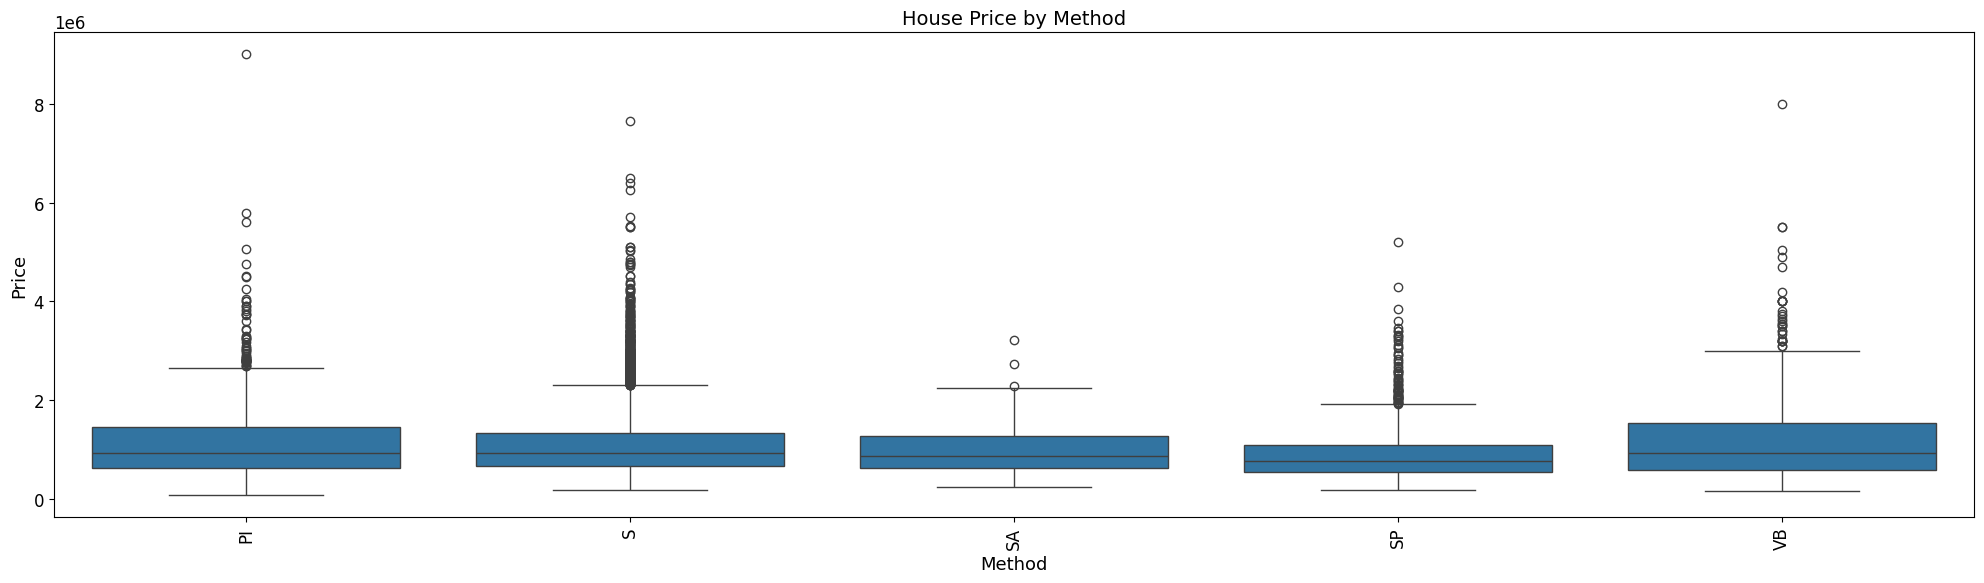

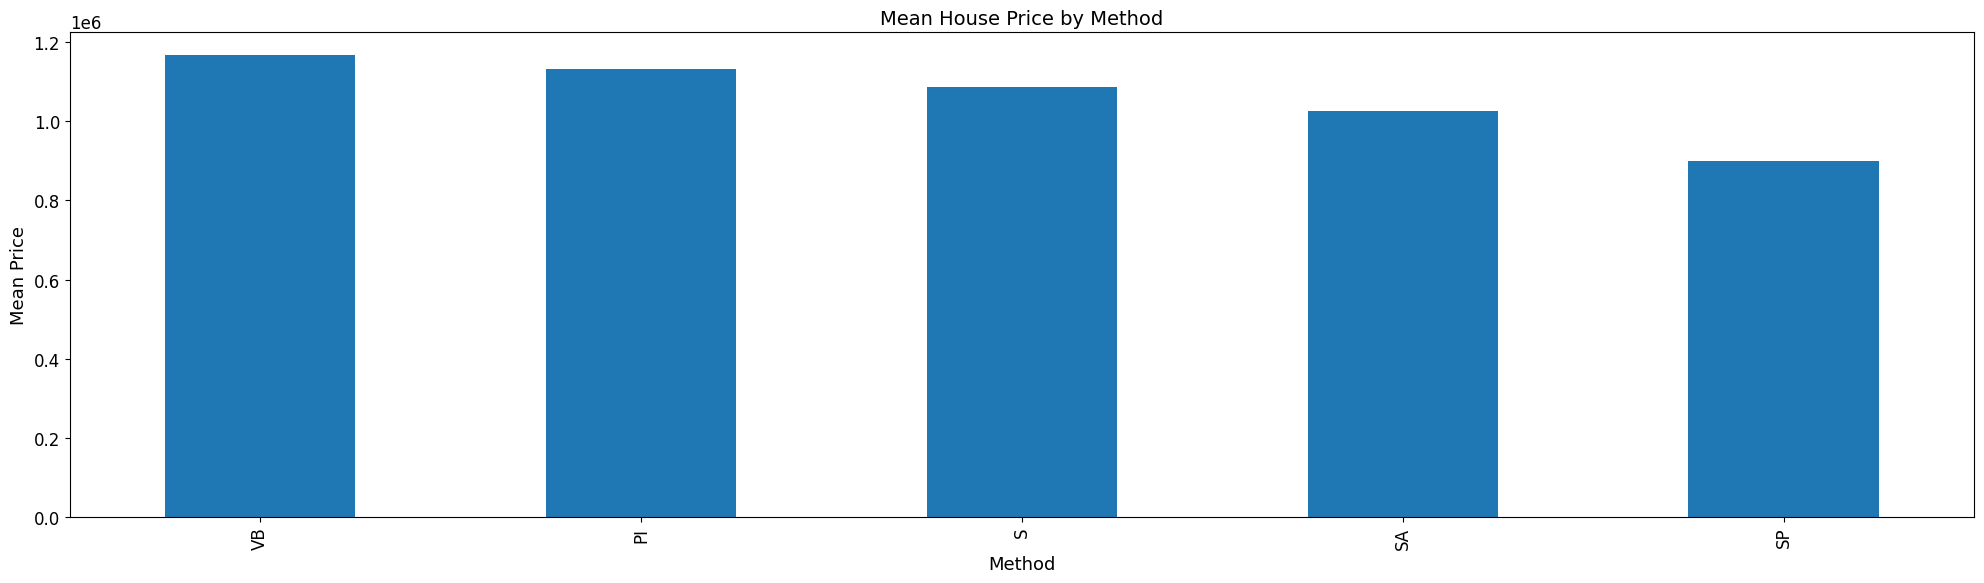

ANOVA test for Method:
F-statistic: 42.81914880362474
p-value: 9.392065939264317e-36
Effect size (Eta-squared): 0.012459853694063279

Top 5 categories by mean price:
Method
VB    1.166510e+06
PI    1.133242e+06
S     1.087327e+06
SA    1.025772e+06
SP    8.998924e+05
Name: Price, dtype: float64

Bottom 5 categories by mean price:
Method
VB    1.166510e+06
PI    1.133242e+06
S     1.087327e+06
SA    1.025772e+06
SP    8.998924e+05
Name: Price, dtype: float64

---

Bivariate Analysis for SellerG


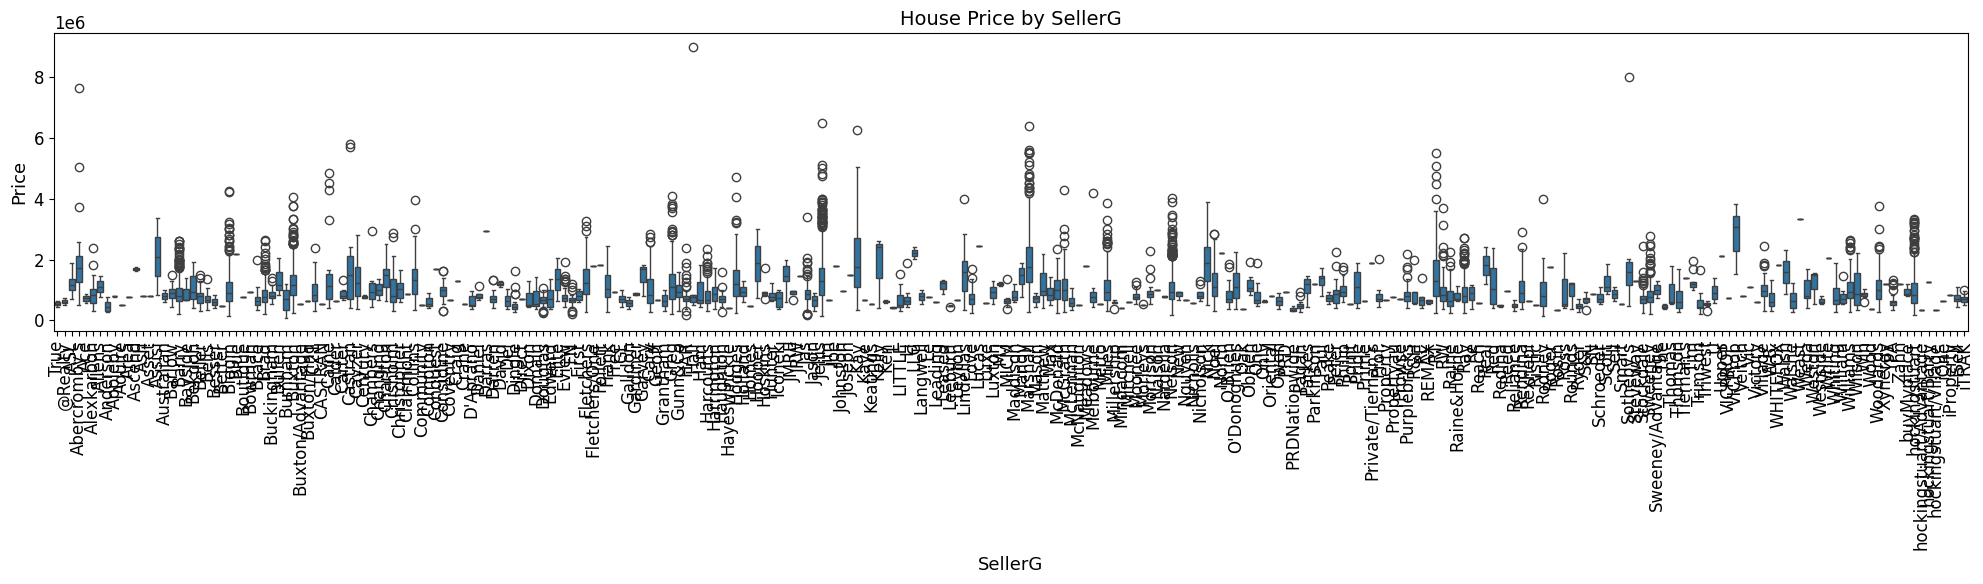

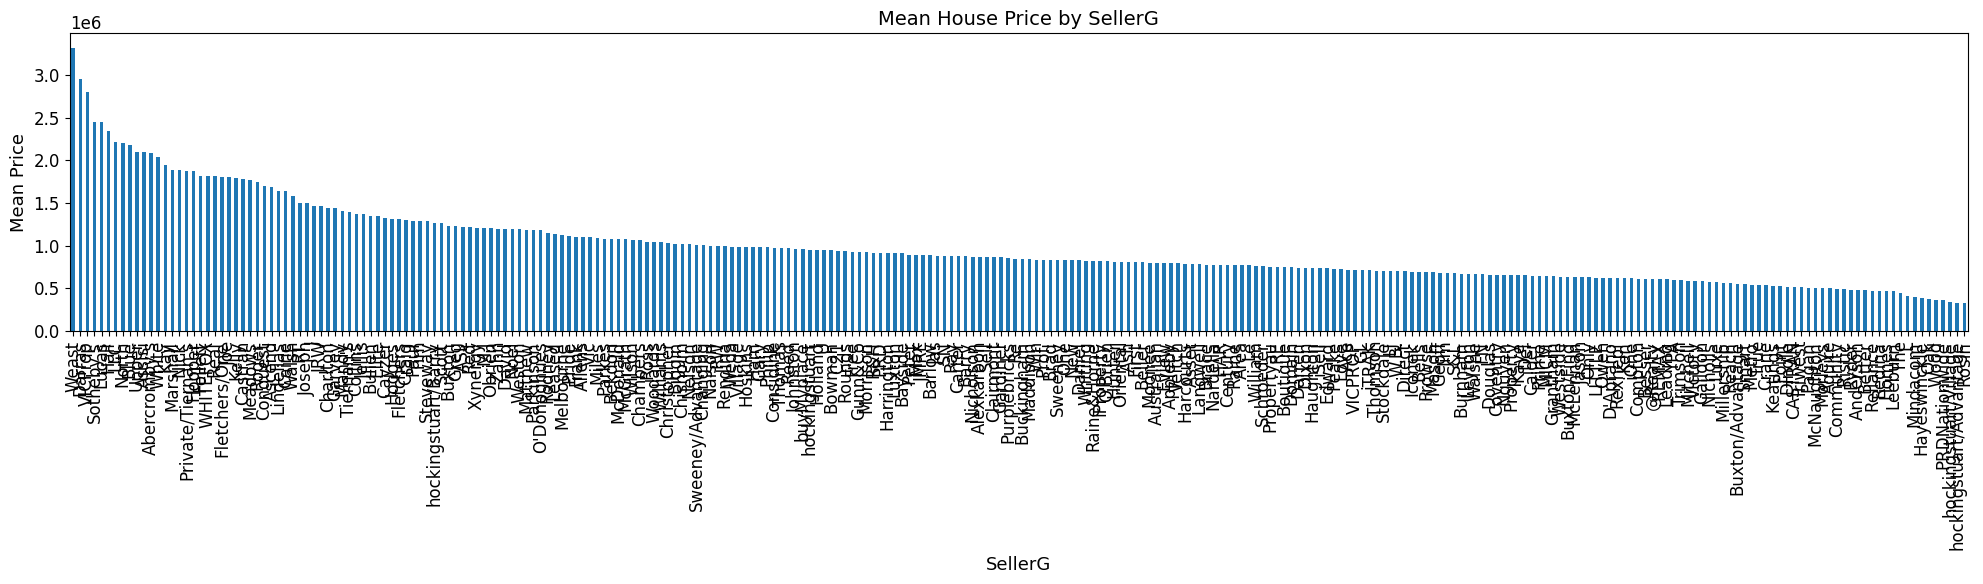

ANOVA test for SellerG:
F-statistic: 14.783872729130614
p-value: 0.0
Effect size (Eta-squared): 0.22870541601563446

Top 5 categories by mean price:
SellerG
Weast        3.320000e+06
Darras       2.950000e+06
VICProp      2.797667e+06
Sotheby's    2.453750e+06
Lucas        2.450000e+06
Name: Price, dtype: float64

Bottom 5 categories by mean price:
SellerG
Wood                       370000.000000
PRDNationwide              368333.333333
hockingstuart/Village      345000.000000
hockingstuart/Advantage    330000.000000
Rosin                      330000.000000
Name: Price, dtype: float64

---

Bivariate Analysis for CouncilArea


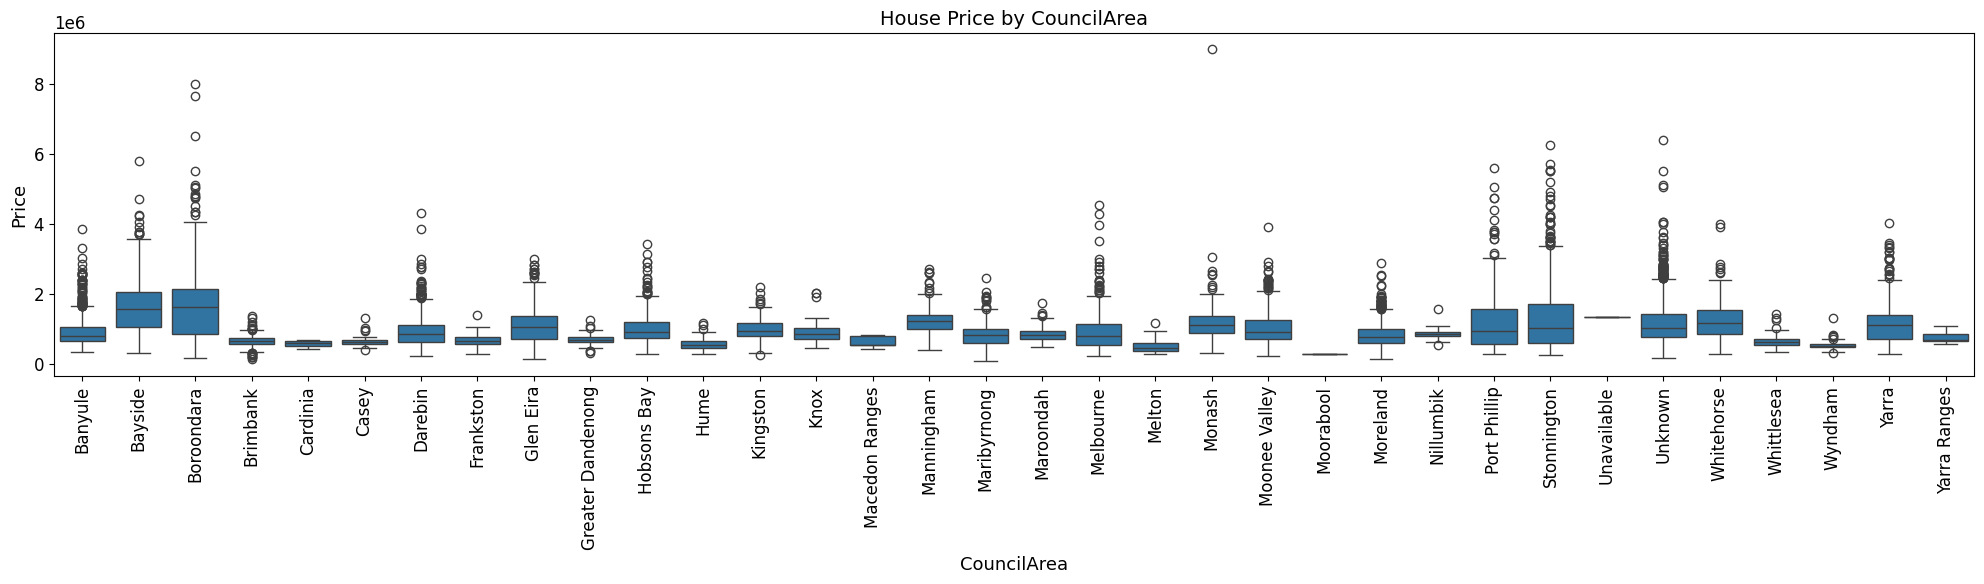

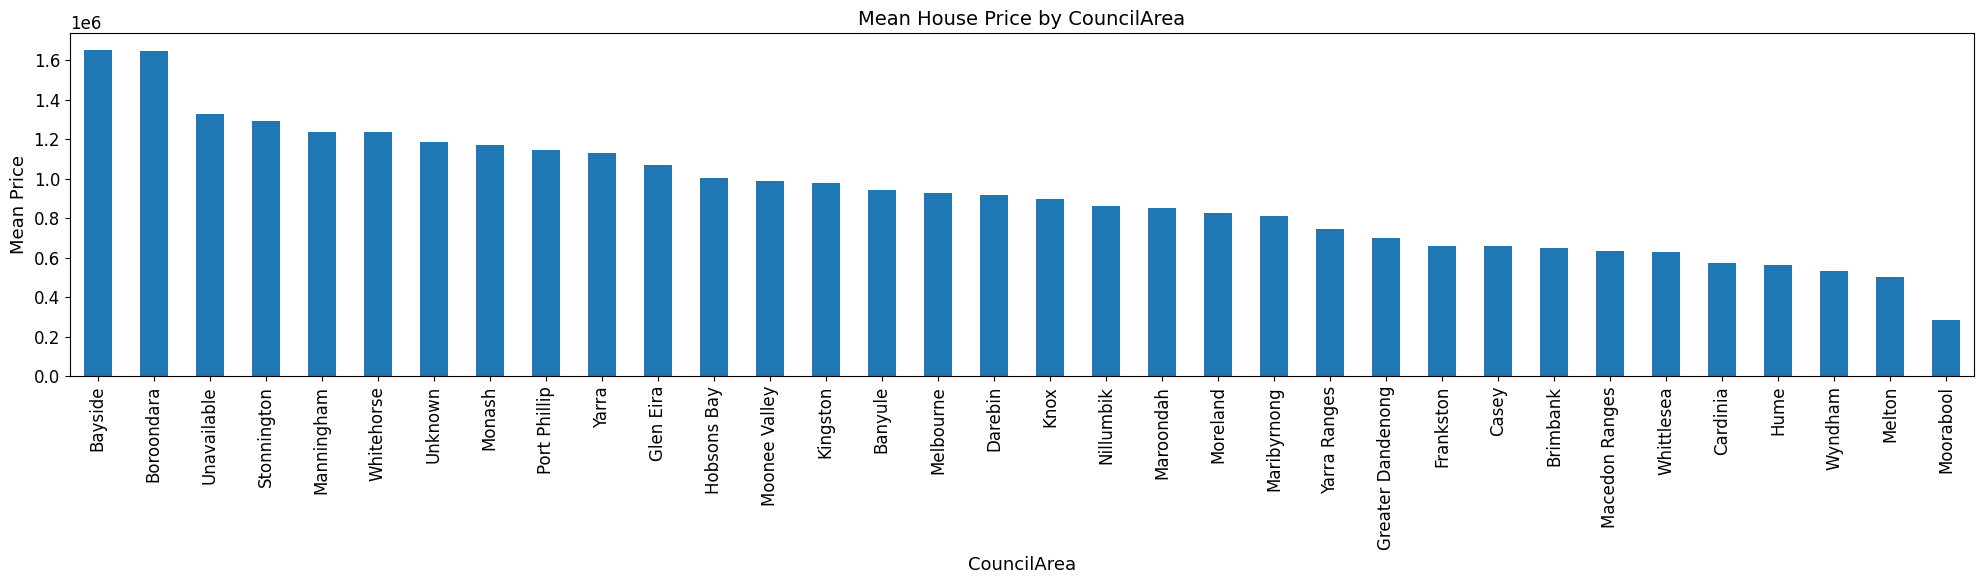

ANOVA test for CouncilArea:
F-statistic: 93.64647710646226
p-value: 0.0
Effect size (Eta-squared): 0.18575809982968525

Top 5 categories by mean price:
CouncilArea
Bayside        1.652168e+06
Boroondara     1.647217e+06
Unavailable    1.325000e+06
Stonnington    1.293382e+06
Manningham     1.235161e+06
Name: Price, dtype: float64

Bottom 5 categories by mean price:
CouncilArea
Cardinia     573125.000000
Hume         561406.707317
Wyndham      531813.372093
Melton       499622.727273
Moorabool    285000.000000
Name: Price, dtype: float64

---

Bivariate Analysis for Regionname


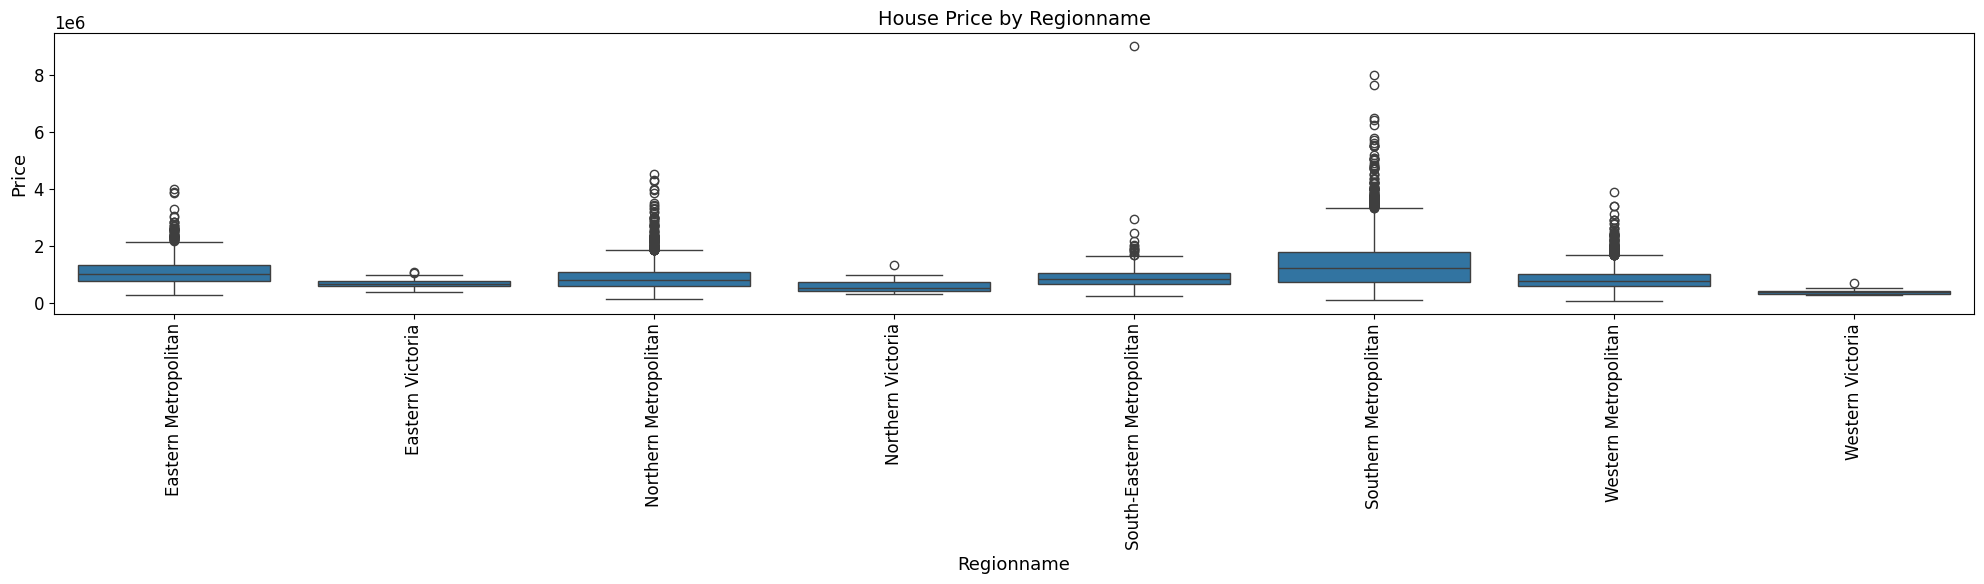

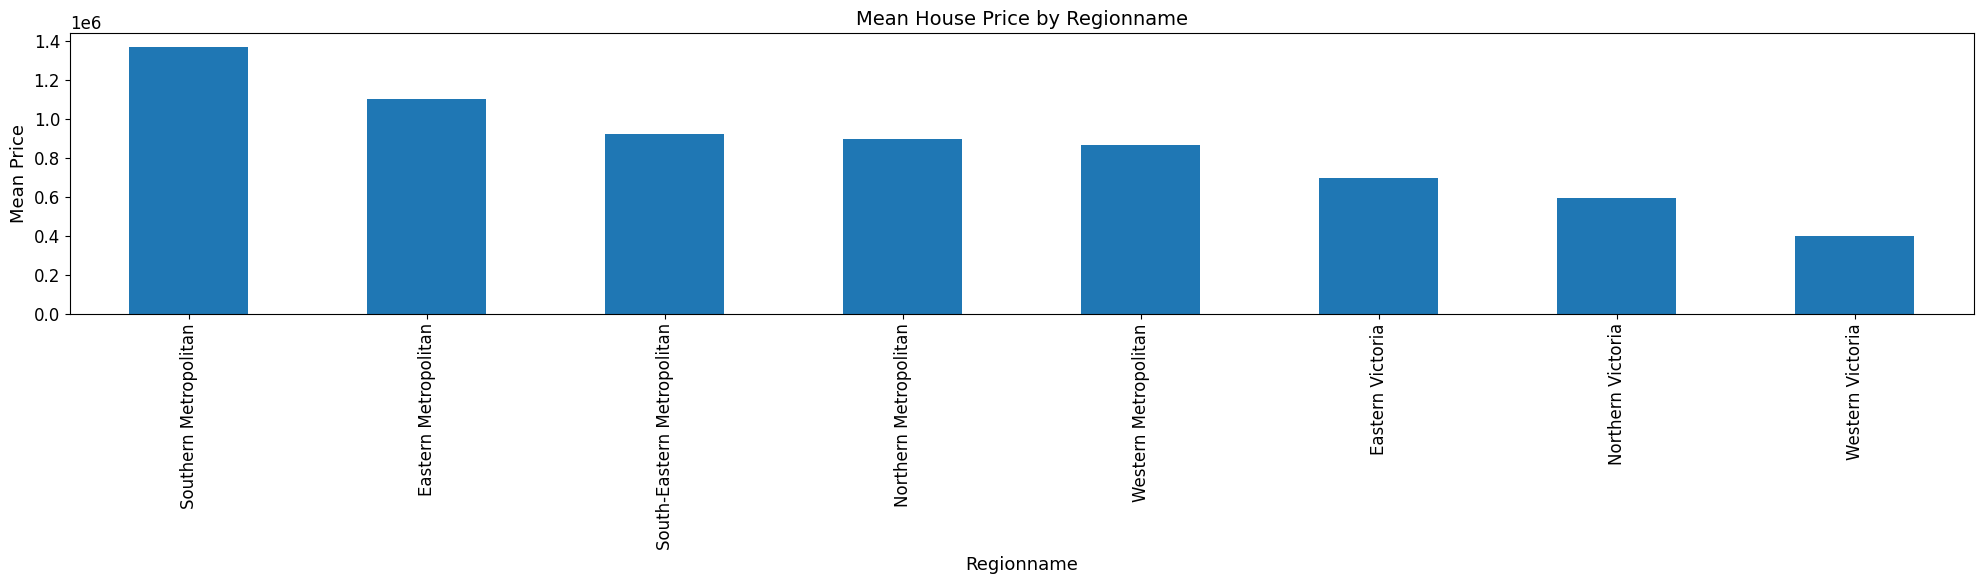

ANOVA test for Regionname:
F-statistic: 284.40018651008097
p-value: 0.0
Effect size (Eta-squared): 0.12792049878950632

Top 5 categories by mean price:
Regionname
Southern Metropolitan         1.372963e+06
Eastern Metropolitan          1.104080e+06
South-Eastern Metropolitan    9.229438e+05
Northern Metropolitan         8.981711e+05
Western Metropolitan          8.664205e+05
Name: Price, dtype: float64

Bottom 5 categories by mean price:
Regionname
Northern Metropolitan    898171.082262
Western Metropolitan     866420.520014
Eastern Victoria         699980.792453
Northern Victoria        594829.268293
Western Victoria         397523.437500
Name: Price, dtype: float64

---


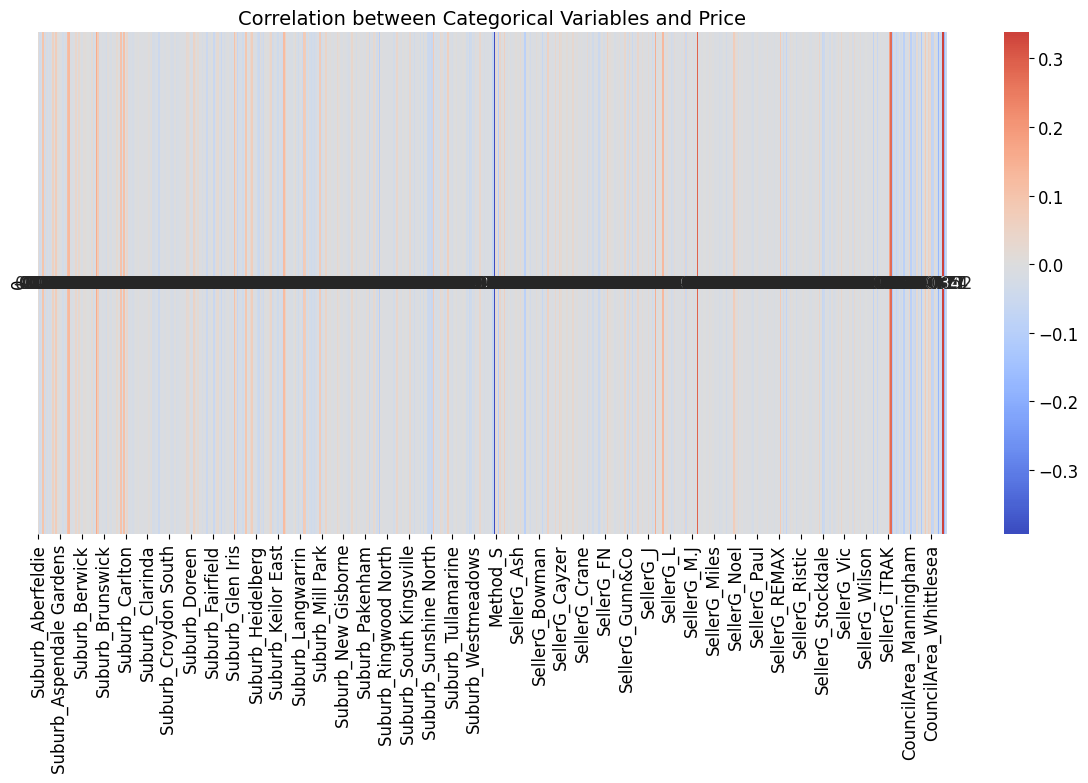

Correlation between categorical variables and Price:
Regionname_Southern Metropolitan    0.338032
SellerG_Marshall                    0.287260
CouncilArea_Boroondara              0.273221
CouncilArea_Bayside                 0.174285
Suburb_Brighton                     0.157509
                                      ...   
CouncilArea_Moreland               -0.119263
CouncilArea_Brimbank               -0.120326
Regionname_Western Metropolitan    -0.172367
Regionname_Northern Metropolitan   -0.175933
Type_u                             -0.393378
Length: 626, dtype: float64


In [21]:
def bivariate_analysis(dataset, cat_vars):
    for var in cat_vars:
        # Check if the variable exists in the dataset
        if var not in dataset.columns:
            print(f"Warning: {var} not found in the dataset. Skipping this variable.")
            continue
        
        print(f"\nBivariate Analysis for {var}")
        
        # Box plot
        plt.figure(figsize=(20, 6))
        sns.boxplot(x=var, y='Price', data=dataset)
        plt.title(f'House Price by {var}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
        
        # Bar plot of mean prices
        mean_prices = dataset.groupby(var)['Price'].mean().sort_values(ascending=False)
        plt.figure(figsize=(20, 6))
        mean_prices.plot(kind='bar')
        plt.title(f'Mean House Price by {var}')
        plt.ylabel('Mean Price')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
        
        # ANOVA test
        categories = dataset[var].unique()
        price_groups = [dataset[dataset[var] == cat]['Price'] for cat in categories]
        f_statistic, p_value = stats.f_oneway(*price_groups)
        print(f"ANOVA test for {var}:")
        print(f"F-statistic: {f_statistic}")
        print(f"p-value: {p_value}")
        
        # Effect size (Eta-squared)
        df_bg = len(categories) - 1
        df_wg = len(dataset) - len(categories)
        eta_squared = (f_statistic * df_bg) / (f_statistic * df_bg + df_wg)
        print(f"Effect size (Eta-squared): {eta_squared}")
        
        # Top 5 and bottom 5 categories by mean price
        print("\nTop 5 categories by mean price:")
        print(mean_prices.head())
        print("\nBottom 5 categories by mean price:")
        print(mean_prices.tail())
        print("\n---")

# Perform bivariate analysis for each categorical variable
bivariate_analysis(dataset, cat_vars)

def correlation_analysis_categorical(dataset, cat_vars):
    # Create an empty DataFrame to store encoded variables
    df_encoded = pd.DataFrame()

    # Encode each categorical variable separately
    for var in cat_vars:
        # Check if the variable exists in the dataset
        if var not in dataset.columns:
            print(f"Warning: {var} not found in the dataset. Skipping this variable.")
            continue
        
        # Perform one-hot encoding for each categorical variable
        encoded = pd.get_dummies(dataset[var], prefix=var, drop_first=True)
        df_encoded = pd.concat([df_encoded, encoded], axis=1)

    # Calculate correlation with Price
    correlation_matrix = df_encoded.apply(lambda x: x.corr(dataset['Price']))

    # Sort correlations
    correlation_matrix_sorted = correlation_matrix.sort_values(ascending=False)

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix.to_frame().T, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation between Categorical Variables and Price')
    plt.tight_layout()
    plt.show()

    print("Correlation between categorical variables and Price:")
    print(correlation_matrix_sorted)

    return correlation_matrix_sorted

# Usage:
cat_vars = ['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']
correlation_results = correlation_analysis_categorical(dataset, cat_vars)

#### Observation
- The `Suburb` factor alone accounts for a large portion (31.3%) of the variability in house prices, indicating it's a crucial factor in determining property values.
- The `Type` factor alone accounts for a smaller portion (17.2%) of the variability in house prices, indicating it's a crucial factor in determining property values.
- The `Method` factor alone accounts for a very small portion (1.2%) of the variability in house prices, indicating it's a monor factor in determining property values.
- The `SellerG` factor alone accounts for a large portion (22.9%) of the variability in house prices, indicating it's a crucial factor in determining property values.
- The `CouncilArea` factor alone accounts for a large portion (18.6%) of the variability in house prices, indicating it's a crucial factor in determining property values.
- The `Regionname` factor alone accounts for a smaller portion (12.8%) of the variability in house prices, indicating it's a crucial factor in determining property values.

#### Conclusion
1. The number of `rooms, bedrooms, and bathrooms` are the strongest predictors of price in this dataset.
1. Distance from the center has a slight negative impact on price.
1. Surprisingly, land size doesn't seem to significantly affect the price in this dataset.
1. There might be multicollinearity between Rooms and Bedroom2, which could affect certain types of analyses if both are used as predictors.
1. `Regional differences:` There are clear price differences between regions. The Southern Metropolitan region is associated with higher prices, while the Northern and Western Metropolitan regions are associated with lower prices. This suggests significant geographical variation in the housing market.
1. `Council areas:` Some council areas (like Boroondara and Bayside) are associated with higher prices, while others (like Brimbank and Moreland) are associated with lower prices. This could reflect differences in local amenities, schools, or overall desirability of these areas.
1. `Property type:` The strongest negative correlation is with "Type_u" (likely "unit"), indicating that units are generally priced lower than other property types (like houses).
1. `Seller agency:` The strong positive correlation with "SellerG_Marshall" suggests that this particular agency might specialize in higher-end properties, or operate in more expensive areas.
1. `Suburbs:` Individual suburbs (like Brighton) can have notable correlations with price, reinforcing the importance of location in property valuation.
1. `Magnitude of correlations:` While these correlations are statistically significant, none are extremely strong (all are below 0.4 in absolute value). This suggests that while these factors are important, no single categorical variable overwhelmingly determines the price. Other factors (like property size, number of rooms, etc.) likely play significant roles as well.
1. `Complexity of the market:` The large number of variables (626) and the range of correlations indicate a complex housing market with many factors influencing price.

### Hypothsesis Testing and Analytical Questions

#### Question 1. Which Region has the most/least number of properities?

Region with the most properties: Southern Metropolitan (4695 properties)
Region with the least properties: Western Victoria (32 properties)


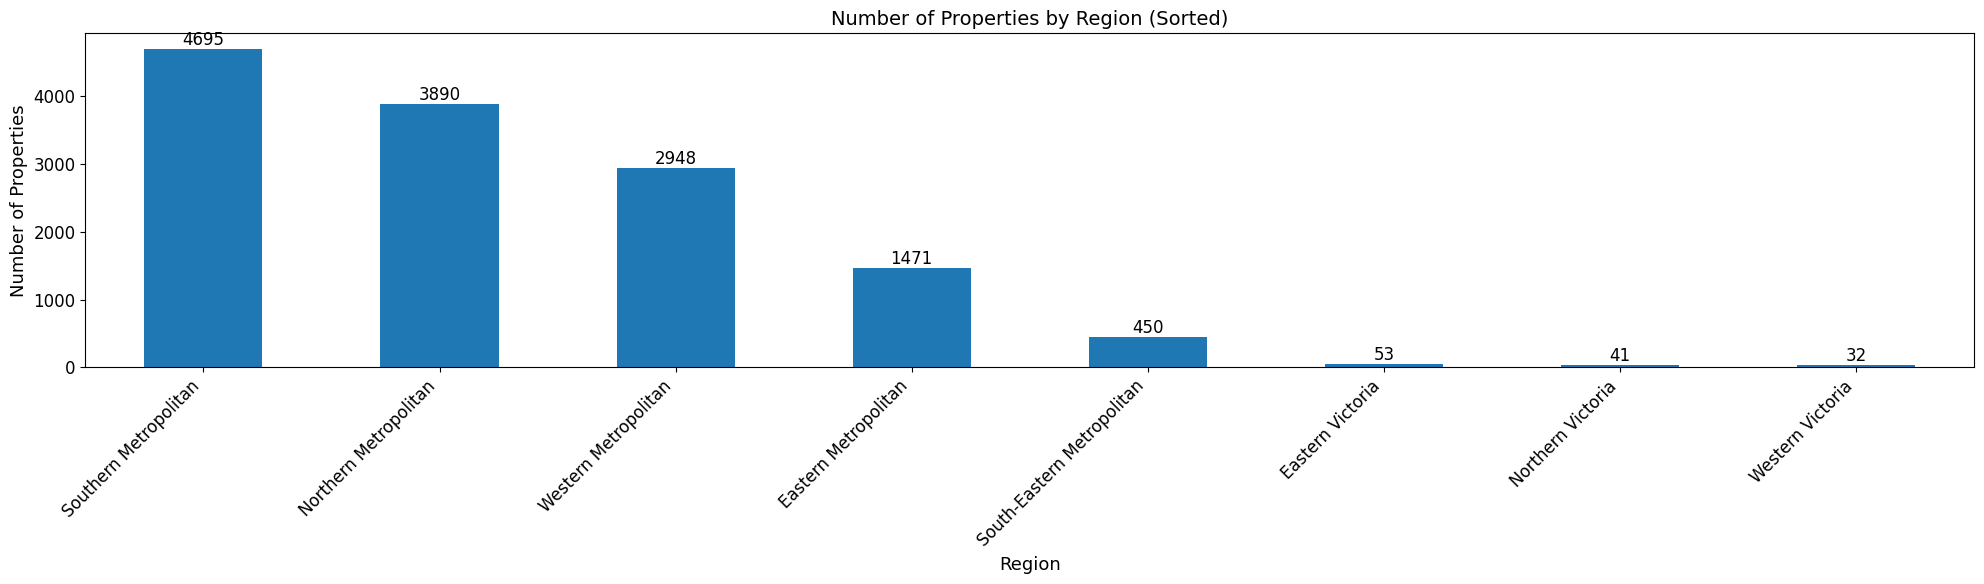


Sorted property counts by region:
Regionname
Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: count, dtype: int64


In [22]:
def analyze_sorted_region_property_counts(dataset):
    # Count the number of properties in each region
    region_counts = dataset['Regionname'].value_counts().sort_values(ascending=False)

    # Determine the region with the most and least properties
    region_most = region_counts.index[0]
    region_least = region_counts.index[-1]

    print(f"Region with the most properties: {region_most} ({region_counts[region_most]} properties)")
    print(f"Region with the least properties: {region_least} ({region_counts[region_least]} properties)")

    # Visualize the results
    plt.figure(figsize=(20, 6))
    region_counts.plot(kind='bar')
    plt.title('Number of Properties by Region (Sorted)')
    plt.xlabel('Region')
    plt.ylabel('Number of Properties')
    plt.xticks(rotation=45, ha='right')
    
    # Annotate the bars with the exact count
    for i, v in enumerate(region_counts):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Print the sorted counts
    print("\nSorted property counts by region:")
    print(region_counts)


analyze_sorted_region_property_counts(dataset)

#### Question 2. Which property based on the number of bedrooms sold the most/least?

Property type that sold the most:
3-bedroom properties (5,896 sales)
Property type that sold the least:
10-bedroom properties (1 sales)


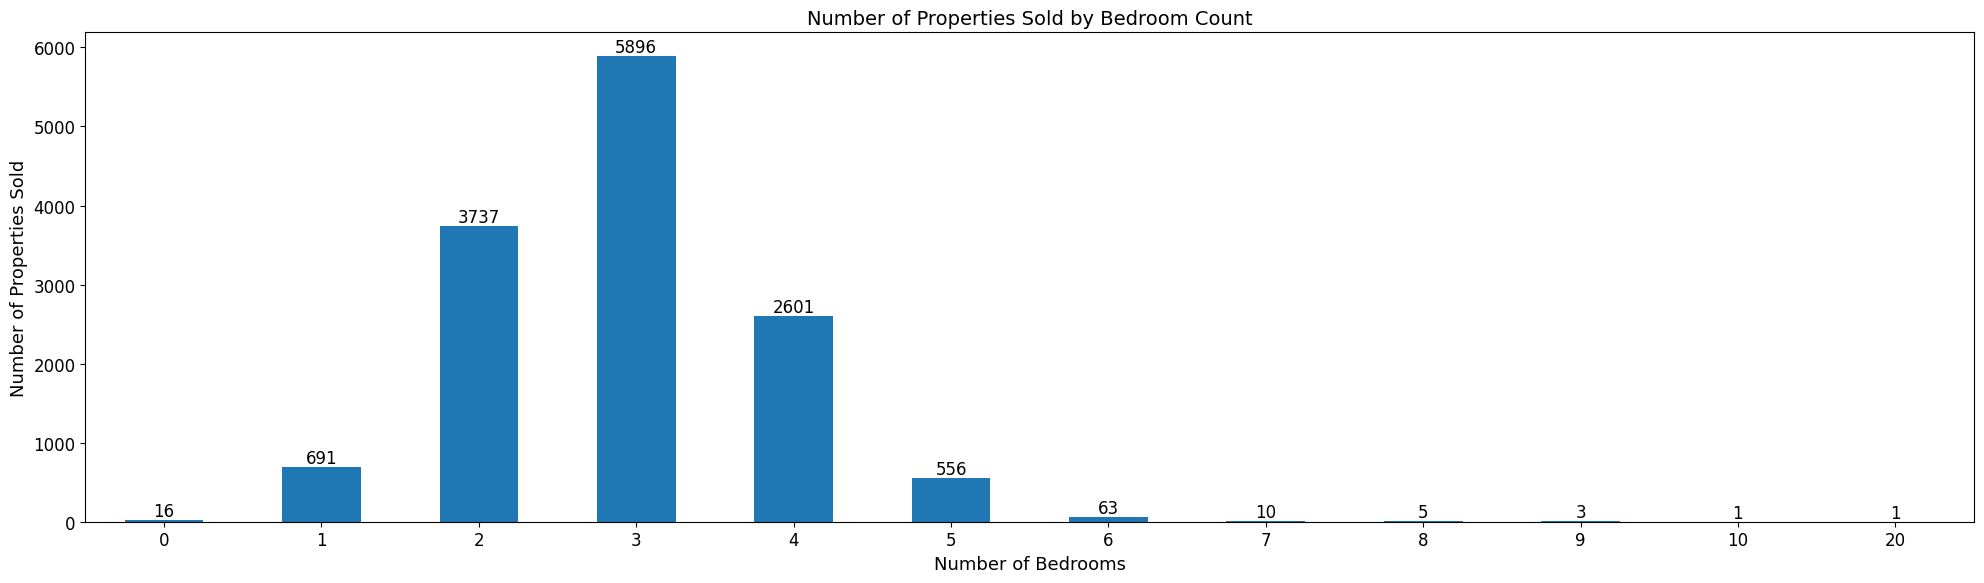


Detailed sales by bedroom count:
Bedroom2
0       16
1      691
2     3737
3     5896
4     2601
5      556
6       63
7       10
8        5
9        3
10       1
20       1
Name: count, dtype: int64


In [23]:
def analyze_bedroom_sales(dataset):
        
    # Count the number of properties sold for each bedroom count
    bedroom_counts = dataset['Bedroom2'].value_counts().sort_index()
    
    # Find the bedroom count with the most sales
    most_sold_bedrooms = bedroom_counts.idxmax()
    most_sold_count = bedroom_counts.max()
    
    # Find the bedroom count with the most sales
    least_sold_bedrooms = bedroom_counts.idxmin()
    least_sold_count = bedroom_counts.min()
    
    print(f"Property type that sold the most:")
    print(f"{most_sold_bedrooms}-bedroom properties ({most_sold_count:,} sales)")
    
    print(f"Property type that sold the least:")
    print(f"{least_sold_bedrooms}-bedroom properties ({least_sold_count} sales)")
    
    # Visualize the results
    plt.figure(figsize=(20, 6))
    bedroom_counts.plot(kind='bar')
    plt.title('Number of Properties Sold by Bedroom Count')
    plt.xlabel('Number of Bedrooms')
    plt.ylabel('Number of Properties Sold')
    plt.xticks(rotation=0)
    
    # Annotate the bars with the exact count
    for i, v in enumerate(bedroom_counts):
        plt.text(i, v, str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Print the detailed counts
    print("\nDetailed sales by bedroom count:")
    print(bedroom_counts)

analyze_bedroom_sales(dataset)

#### Question 3. What is the most common number of carspots for properties in Albion?

Most common number of car spots in Albion:
1.0 spots (19 properties)


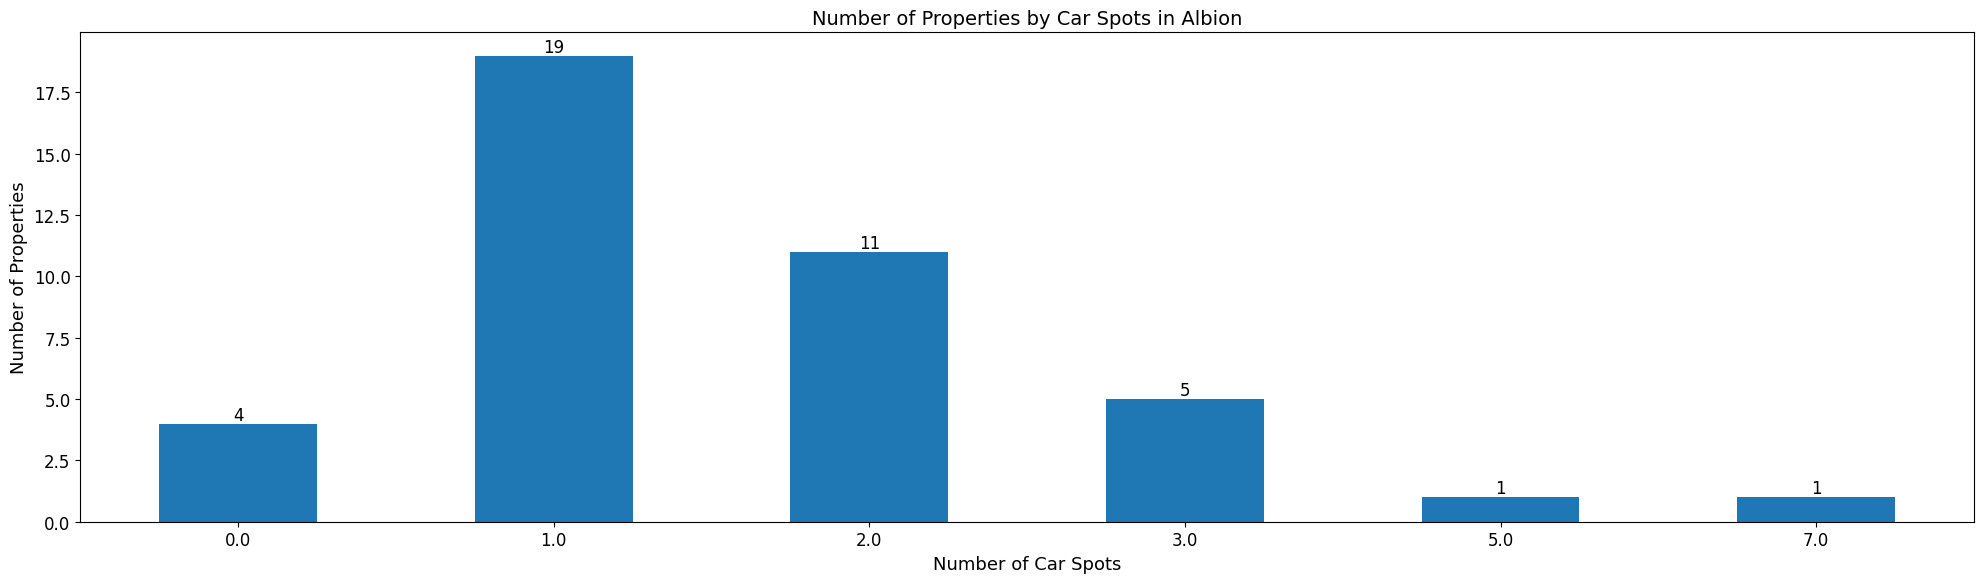


Detailed property counts by number of car spots:
Car
0.0     4
1.0    19
2.0    11
3.0     5
5.0     1
7.0     1
Name: count, dtype: int64


In [24]:
def analyze_car_spots_in_albion(dataset):
    # Filter the dataset for Albion suburb
    albion_data = dataset[dataset['Suburb'] == 'Albion']
    
    if albion_data.empty:
        print("No data available for Albion suburb.")
        return
    
    # Count the number of properties for each car spot count
    car_spot_counts = albion_data['Car'].value_counts().sort_index()
    
    if car_spot_counts.empty:
        print("No car spot data available for Albion suburb.")
        return
    
    # Find the most common number of car spots
    most_common_spots = car_spot_counts.idxmax()
    most_common_count = car_spot_counts.max()
    
    print(f"Most common number of car spots in Albion:")
    print(f"{most_common_spots} spots ({most_common_count} properties)")
    
    # Visualize the results
    plt.figure(figsize=(20, 6))
    car_spot_counts.plot(kind='bar')
    plt.title('Number of Properties by Car Spots in Albion')
    plt.xlabel('Number of Car Spots')
    plt.ylabel('Number of Properties')
    plt.xticks(rotation=0)
    
    # Annotate the bars with the exact count
    for i, v in enumerate(car_spot_counts):
        plt.text(i, v, str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Print the detailed counts
    print("\nDetailed property counts by number of car spots:")
    print(car_spot_counts)

analyze_car_spots_in_albion(dataset)

#### Question 4. How many properities were build in the year that most of the properties were build?

The year when most properties were built: 1970
Number of properties built in 1970: 866


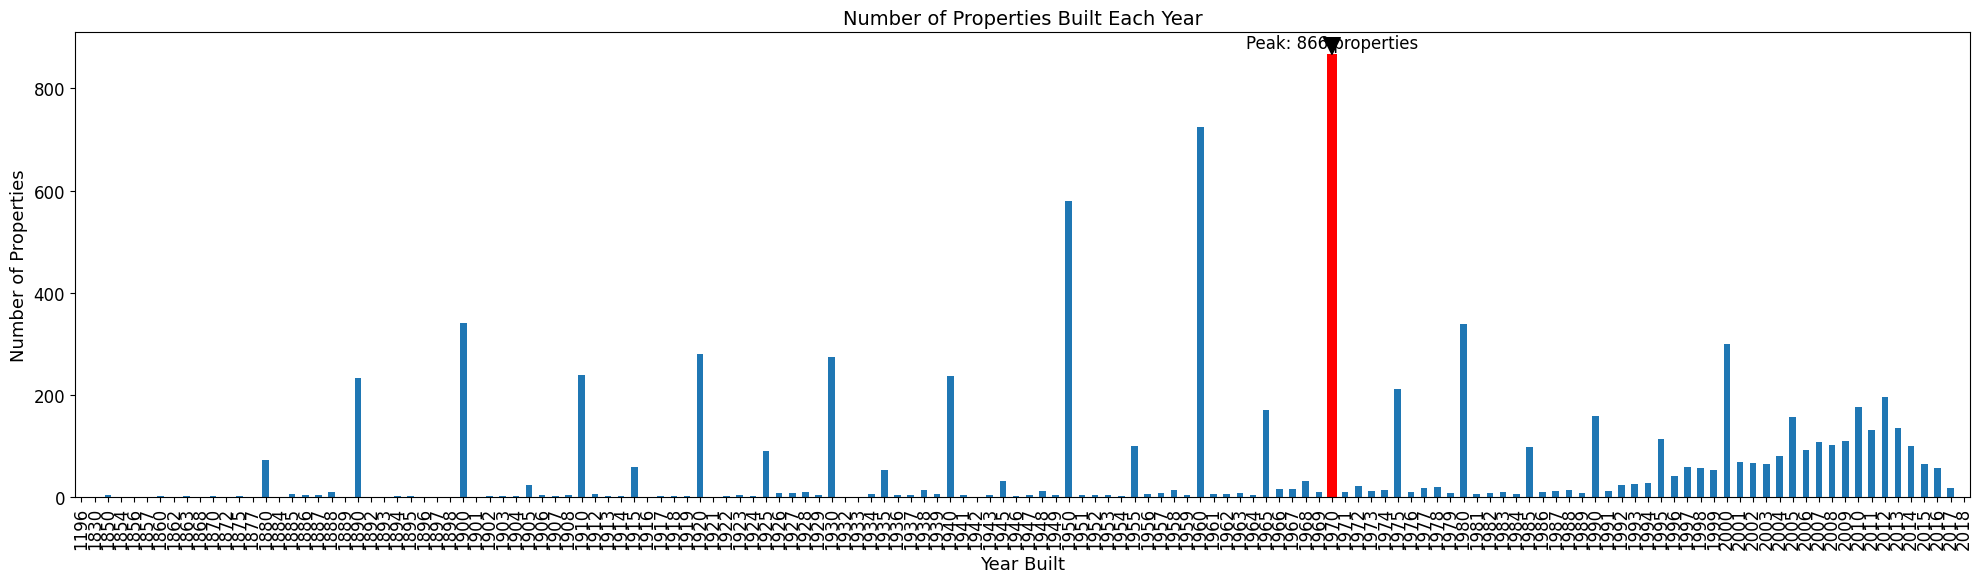


Detailed property counts by year built:
YearBuilt
1196      1
1830      1
1850      4
1854      1
1856      1
       ... 
2014    100
2015     65
2016     58
2017     18
2018      1
Name: count, Length: 144, dtype: int64


In [25]:
def analyze_peak_construction_year(dataset):
    # Check if 'YearBuilt' column exists
    if 'YearBuilt' not in dataset.columns:
        print("Error: 'YearBuilt' column not found in the dataset.")
        return

    # Remove any rows where YearBuilt is null
    dataset = dataset.dropna(subset=['YearBuilt'])

    # Convert YearBuilt to integer type
    dataset['YearBuilt'] = dataset['YearBuilt'].astype(int)

    # Find the year with the most properties built
    peak_year = dataset['YearBuilt'].mode().iloc[0]
    properties_in_peak_year = dataset[dataset['YearBuilt'] == peak_year].shape[0]

    print(f"The year when most properties were built: {peak_year}")
    print(f"Number of properties built in {peak_year}: {properties_in_peak_year}")

    # Count properties built each year
    year_counts = dataset['YearBuilt'].value_counts().sort_index()

    # Visualize the results
    plt.figure(figsize=(20, 6))
    year_counts.plot(kind='bar')
    plt.title('Number of Properties Built Each Year')
    plt.xlabel('Year Built')
    plt.ylabel('Number of Properties')
    plt.xticks(rotation=90)

    # Highlight the peak year
    peak_year_index = year_counts.index.get_loc(peak_year)
    plt.bar(peak_year_index, year_counts[peak_year], color='red')

    # Annotate the peak year
    plt.annotate(f'Peak: {properties_in_peak_year} properties',
                 xy=(peak_year_index, year_counts[peak_year]),
                 xytext=(peak_year_index, year_counts[peak_year] + 5),
                 ha='center', va='bottom',
                 arrowprops=dict(facecolor='black', shrink=0.05))

    plt.tight_layout()
    plt.show()

    # Print detailed information
    print("\nDetailed property counts by year built:")
    print(year_counts)

analyze_peak_construction_year(dataset)

#### Hypothesis Testing

In [26]:
def hypothesis_tests_price_factors(dataset):
    print("Hypothesis Tests for Factors Affecting Selling Price")
    print("====================================================")
    
    # Ensure 'Price' is numeric
    dataset['Price'] = pd.to_numeric(dataset['Price'], errors='coerce')
    
    # Separate numerical and categorical variables
    numerical_vars = dataset.select_dtypes(include=[np.number]).columns.tolist()
    categorical_vars = dataset.select_dtypes(include=['category']).columns.tolist()
    
    # Remove 'Price' from numerical variables if it's there
    if 'Price' in numerical_vars:
        numerical_vars.remove('Price')
    
    print("\nTesting Numerical Variables:")
    print("----------------------------")
    #for var in numerical_vars:
    for var in numerical_vars:
        if var != 'Price':  # Skip the target variable 'Price'
            # Drop rows where either 'var' or 'Price' is NaN
            subset = dataset[[var, 'Price']].dropna()
                               
        # Perform Pearson correlation test
        correlation, p_value = stats.pearsonr(subset[var], subset['Price'])
        print(f"{var}:")
        print(f"  Correlation coefficient: {correlation:.4f}")
        print(f"  P-value: {p_value:.4f}")
        if p_value < 0.05:
            print("  Reject null hypothesis: There is a significant relationship with Price")
        else:
            print("  Fail to reject null hypothesis: No significant evidence of a relationship with Price")
        print()
    
    print("\nTesting Categorical Variables:")
    print("------------------------------")
    for var in categorical_vars:
        # Perform one-way ANOVA
        groups = [group for _, group in dataset.groupby(var)['Price']]
        f_value, p_value = stats.f_oneway(*groups)
        print(f"{var}:")
        print(f"  F-value: {f_value:.4f}")
        print(f"  P-value: {p_value:.4f}")
        if p_value < 0.05:
            print("  Reject null hypothesis: There are significant differences in Price across categories")
        else:
            print("  Fail to reject null hypothesis: No significant evidence of differences in Price across categories")
        print()

    # Multiple Linear Regression
    print("\nMultiple Linear Regression:")
    print("---------------------------")
    # Prepare data for regression (use only numeric variables)
    X = dataset[numerical_vars].drop(columns=['Price'], errors='ignore')  # Exclude 'Price' from independent vars
    y = dataset['Price']
    
    # Step 1: Remove rows with missing values (NaN) in X or y
    X = sm.add_constant(X)  # Add constant (intercept) to the model
    X = X.replace([np.inf, -np.inf], np.nan).dropna()  # Replace infinite values and drop rows with NaNs
    y = y.loc[X.index]  # Ensure y matches the cleaned X
    
    # Step 2: Fit the OLS model
    model = sm.OLS(y, X).fit()
    
    # Step 3: Print model summary
    print(model.summary())
    
    print("\nInterpretation of Multiple Linear Regression:")
    print("  - Variables with p-value < 0.05 in the regression model are considered significant predictors of Price")
    print("  - The R-squared value indicates the proportion of variance in Price explained by the model")


hypothesis_tests_price_factors(dataset)

Hypothesis Tests for Factors Affecting Selling Price

Testing Numerical Variables:
----------------------------
Rooms:
  Correlation coefficient: 0.4966
  P-value: 0.0000
  Reject null hypothesis: There is a significant relationship with Price

Distance:
  Correlation coefficient: -0.1625
  P-value: 0.0000
  Reject null hypothesis: There is a significant relationship with Price

Bedroom2:
  Correlation coefficient: 0.4760
  P-value: 0.0000
  Reject null hypothesis: There is a significant relationship with Price

Bathroom:
  Correlation coefficient: 0.4670
  P-value: 0.0000
  Reject null hypothesis: There is a significant relationship with Price

Car:
  Correlation coefficient: 0.2390
  P-value: 0.0000
  Reject null hypothesis: There is a significant relationship with Price

Landsize:
  Correlation coefficient: 0.0375
  P-value: 0.0000
  Reject null hypothesis: There is a significant relationship with Price

BuildingArea:
  Correlation coefficient: 0.0910
  P-value: 0.0000
  Reject null

## Data Preparation

#### Data Splitting

In [27]:
# dropping the price variable before splitting the dataset into train and evaluation dataset 
dataset2 = dataset.dropna(subset=['Price'])

In [28]:
# split the data into input(x) variable

#code
X = dataset2.drop("Price", axis = 1)

#test
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  category      
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  category      
 4   Method         13580 non-null  category      
 5   SellerG        13580 non-null  category      
 6   Date           13580 non-null  datetime64[ns]
 7   Distance       13580 non-null  float64       
 8   Postcode       13580 non-null  object        
 9   Bedroom2       13580 non-null  int64         
 10  Bathroom       13580 non-null  int64         
 11  Car            13518 non-null  float64       
 12  Landsize       13580 non-null  int64         
 13  BuildingArea   7130 non-null   float64       
 14  YearBuilt      8205 non-null   float64       
 15  CouncilArea    1358

In [29]:
# split the data into output(y) variable

#code
y = dataset['Price']

#test
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 13580 entries, 0 to 13579
Series name: Price
Non-Null Count  Dtype
--------------  -----
13580 non-null  int64
dtypes: int64(1)
memory usage: 106.2 KB


In [30]:
#splitting the dataset into training and evaluation datasets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

#### Feature Engineering

In [31]:
#listing Numerical Columns
print(f"Numerical Columns include:{numvariables}")

Numerical Columns include:['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize']


In [32]:
#listing Categorical Columns
print(f"Categorical Columns include:{cat_vars}")

Categorical Columns include:['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']


#### Pipelines
> **Data Pre-processing Pipeline**
>> This pipeline will enable us to impute, encode, scale, Transform and Preprocess our datasets before training our Machine Learning Models with it. This will ensure that our data is suitable for the models to give optimal results.

<Axes: xlabel='Rooms'>

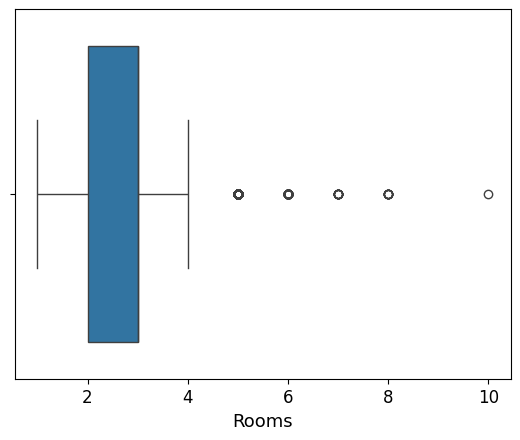

In [33]:
#distribution of rooms variable
num_dataset=dataset[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize']]
sns.boxplot(data=num_dataset.Rooms, orient='h')

<Axes: xlabel='Distance'>

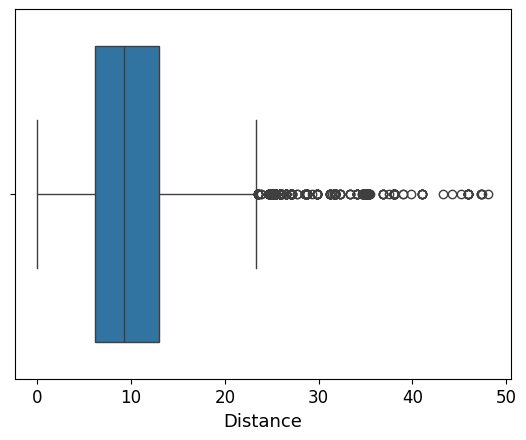

In [34]:
#distribution of distance variable
num_dataset=dataset[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize']]
sns.boxplot(data=num_dataset.Distance, orient='h')

<Axes: xlabel='Bedroom2'>

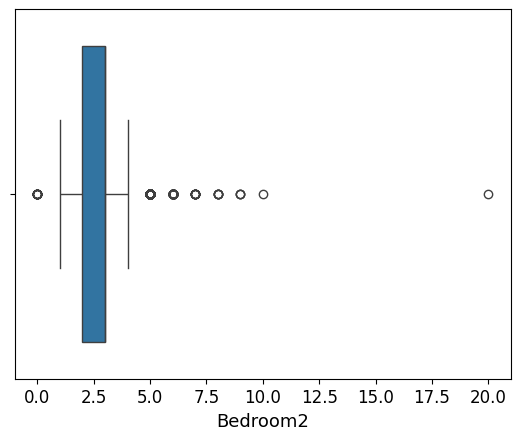

In [35]:
#distribution of bedrooms variable
num_dataset=dataset[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize']]
sns.boxplot(data=num_dataset.Bedroom2, orient='h')

<Axes: xlabel='Bathroom'>

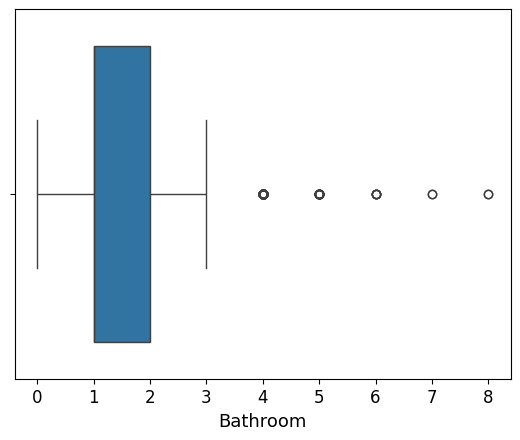

In [36]:
#distribution of bathroom variable
num_dataset=dataset[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize']]
sns.boxplot(data=num_dataset.Bathroom, orient='h')

<Axes: xlabel='Landsize'>

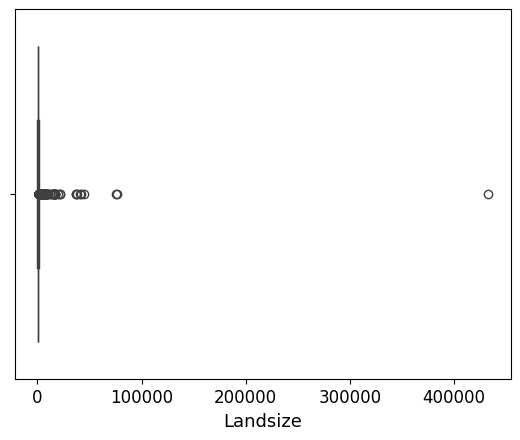

In [37]:
#distribution of land size variable
num_dataset=dataset[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize']]
sns.boxplot(data=num_dataset.Landsize, orient='h')

In [38]:
num_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rooms     13580 non-null  int64  
 1   Distance  13580 non-null  float64
 2   Bedroom2  13580 non-null  int64  
 3   Bathroom  13580 non-null  int64  
 4   Landsize  13580 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 530.6 KB


**Observation**
> - Our `Numerical Variables` don't have missing variables.
> - From the Boxplots above, our numerical variables have outliers.

> **Data Pre-processing Pipeline**

In [41]:
# Convert categorical columns (category types) to string data type
for column in x_train.select_dtypes(include=['category']).columns:
    x_train[column] = x_train[column].astype(str)

In [42]:
# Define numerical and categorical features
numerical_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
            ('scaler', StandardScaler())  # Scaling numerical features
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding categorical features
        ]), categorical_features)
    ])

# Define the machine learning models
models = [
    ('Random Forest', RandomForestClassifier(n_jobs=1)),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC()),
    ('Logistic Regression', LogisticRegression())
]

# Create a machine learning pipeline for each model
for model_name, model in models:
    # Create the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Preprocess the features
        ('model', model)  # The machine learning model
    ])

    # Train the model
    pipeline.fit(x_train, y_train)

    # Predictions on the test set
    y_pred = pipeline.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Display results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("--------------------------------------------------------")


MemoryError: could not allocate 262537216 bytes

In [ ]:
#feature engineering
class LogTransformer:
    def __init__(self, constant=1e-5):
        self.constant = constant

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.log1p(X + self.constant)

# Numeric pipeline
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('log_transformation', FunctionTransformer(LogTransformer().transform)),
    ('scaler', RobustScaler()),
    
])



# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

# Combine the numeric and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline, numerical_features),
    ('categorical_pipeline', categorical_pipeline, categorical_features),
])

In [ ]:
#label encoding
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the testing set using the fitted label encoder
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
#Random Forest 
# Create a pipeline with preprocessor and DecisionTreeClassifier
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline to the training data
decision_tree_pipeline.fit(x_train, y_train_encoded)

In [ ]:
#Gradient Boosting 
# Create a pipeline with preprocessor and DecisionTreeClassifier
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Fit the pipeline to the training data
decision_tree_pipeline.fit(x_train, y_train_encoded)

In [ ]:
#SVC
# Create a pipeline with preprocessor and DecisionTreeClassifier
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Fit the pipeline to the training data
decision_tree_pipeline.fit(x_train, y_train_encoded)

In [ ]:
#logistic Regression
# Create a pipeline with preprocessor and DecisionTreeClassifier
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the pipeline to the training data
decision_tree_pipeline.fit(x_train, y_train_encoded)

In [ ]:
# model comparision by classification report
# Define the machine learning models
models = [
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC(probability=True)),
    ('Logistic Regression', LogisticRegression())
]

# Create a machine learning pipeline for each model
for model_name, model in models:
    # Create the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Preprocess the features
        ('model', model)  # The machine learning model
    ])

    # Train the model
    pipeline.fit(x_train, y_train)

    # Predictions on the test set
    y_pred = pipeline.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Display results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("--------------------------------------------------------")

#### Comparing Models by Classification Reports - Unbalanced

In [ ]:
# Create an empty DataFrame to store evaluation metrics for different models
unbalanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models dictionary, where each item is a model_name: classifier pair
for model_name, classifier in models:
    # Create a pipeline with preprocessing steps and the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
    # Fit the pipeline to the training data
    pipeline.fit(x_train, y_train_encoded)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(x_test)
    
    # Compute classification metrics using the classification_report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract individual metrics for evaluation
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
    unbalanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]


#### Balancing the Dataset

In [ ]:
#Data Balancing
y_train.value_counts()

In [ ]:
#Balance data by oversampling

# Instantiate RandomOverSampler
sampler = RandomOverSampler(random_state=42)

# Fit and apply RandomOverSampler to the training data
x_train_resampled, y_train_resampled = sampler.fit_resample(x_train, y_train_encoded)

#test
pd.DataFrame(y_train_resampled).value_counts()

In [ ]:
# Create an empty DataFrame to store evaluation metrics for different models
balanced_metrics = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models dictionary, where each item is a model_name: classifier pair
for model_name, classifier in models:
    # Create a pipeline with preprocessing steps and the current classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
    # Fit the pipeline to the training data
    pipeline.fit(x_train_resampled, y_train_resampled)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(x_test)
    
    # Compute classification metrics using the classification_report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract individual metrics for evaluation
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the model's evaluation metrics to the DataFrame
    balanced_metrics.loc[len(balanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]

#### Balancing data using SMOTE, training it and comparing results

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Logistic Regression': LogisticRegression(),}

In [ ]:
# Initialize an empty DataFrame to store results
smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

# Iterate over each model and apply SMOTE during training
for model_name, classifier in models.items():
    # Create a pipeline with preprocessing, SMOTE, and the classifier
    imbpipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('Smote', SMOTE(random_state=42)),  # Add a comma here
        ('classifier', classifier)
    ])
    
    # Fit the pipeline to the training data
    imbpipeline.fit(x_train_resampled, y_train_resampled)
    
    # Make predictions on the test data
    smote_y_pred = imbpipeline.predict(x_test)
    
    # Calculate classification metrics using classification_report
    smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)
    
    # Extract relevant metrics
    accuracy = smote_dict['accuracy']
    precision = smote_dict['weighted avg']['precision']
    recall = smote_dict['weighted avg']['recall']
    f1_score = smote_dict['weighted avg']['f1-score']
    
    # Append the results to the DataFrame
    smote_df.loc[len(smote_df)] = [model_name, accuracy, precision, recall, f1_score]

# Print the results DataFrame
print(smote_df)

### Modelling
#### Feature importance, Selection and Model Training

In [ ]:
#feature selection
pd.DataFrame(preprocessor.fit_transform(x_train))

In [ ]:
# Feature selection using SelectKBest
selection = SelectKBest(mutual_info_classif, k=50)
fi_smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

all_pipeline = {}

for model_name, classifier in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_selection', selection),  # Changed 'feature_importance' to 'feature_selection'
        ('classifier', classifier)
    ])
    
    pipeline.fit(x_train, y_train_encoded)

    all_pipeline[model_name] = pipeline

    smote_y_pred = pipeline.predict(x_test)
    
    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)
    
    accuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']
    
    fi_smote_df.loc[len(fi_smote_df)] = [model_name, accuracy, precision, recall, f1_score]

# Print or use the fi_smote_df DataFrame as needed
print(fi_smote_df)

In [ ]:
selection.get_support(indices=True)

#### Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC)- Overlapping

In [ ]:
# Create a plot with subplots
fig, ax = plt.subplots(figsize=(8, 8))

roc_curve_data = {}
all_pipeline = {}

# Loop through models to plot ROC curves
for model_name, classifier in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier)
    ])

    # Fit the pipeline to training data
    pipeline.fit(x_train, y_train_encoded)

    # Get predicted probabilities for positive class
    y_score = pipeline.predict_proba(x_test)[:, 1]
    all_pipeline[model_name] = pipeline

    # Calculate ROC curve and AUC
    fpr, tpr, threshold = roc_curve(y_test_encoded, y_score)
    roc_auc = auc(fpr, tpr)

    roc_curve_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})

    roc_curve_data[model_name] = roc_curve_df

    # Plot ROC curve
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference
ax.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')

# Add legend in the lower right corner
ax.legend(loc='lower right')

# Show the plot
plt.show()

#### Hyperparameters tuning

In [ ]:
# Checking the threshold
roc_curve_data['Logistic Regression'].tail(60)

In [ ]:
# Retrieve the 'Logistic Regression' pipeline
Logistic_Regression_pipeline = all_pipeline['Logistic Regression']

# Make predictions using the pipeline
Logistic_Regression_y_pred = Logistic_Regression_pipeline.predict(x_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test_encoded, Logistic_Regression_y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
sn.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
           xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print or use the confusion matrix variable as needed
print('Confusion Matrix:\n', confusion_mat)

#### Adjusting the threshold

In [ ]:
# Get predicted probabilities for positive class
y_pred_proba = Logistic_Regression_pipeline .predict_proba(x_test)[:, 1]

# Set the threshold
threshold = 0.17

# Create binary predictions based on the threshold
binary_prediction = (y_pred_proba > threshold).astype(int)

# Calculate the confusion matrix with the threshold
threshold_matrix = confusion_matrix(y_test_encoded, binary_prediction)

# Print or use the 'threshold_matrix' variable as needed
print('Confusion Matrix with Threshold:\n', threshold_matrix)

#### Hyperparameter Tuning and Retraining with RandomizedSearchCV and GridSearchCV

In [ ]:
# Define the pipeline with the LogisticRegression classifier
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('feature_importance', selection),
    ('classifier', LogisticRegression(random_state=42))
])

# Define the parameter grid with the best parameters
best_params = {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

# Set the best parameters to the pipeline
logistic_pipeline.set_params(**best_params)

# Fit the pipeline to the training data
logistic_pipeline.fit(x_train, y_train_encoded)

In [ ]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

#### Train model using best parameters

In [ ]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjust the range based on your needs
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

# Create the Logistic Regression pipeline
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

# Create the grid search
grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train_encoded)

#### Evaluate the Model

In [ ]:
# Create the Logistic Regression pipeline with best hyperparameters
logistic_pipeline_best = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=42))
])

# Fit the pipeline to the training data
logistic_pipeline_best.fit(x_train, y_train_encoded)

# Make predictions using the new pipeline
logistic_y_pred_best = logistic_pipeline_best.predict(x_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, logistic_y_pred_best))

#### Predict on a unknown dataset (Test set)

In [14]:
x_test.head(5)

NameError: name 'x_test' is not defined

In [ ]:
# Make predictions using the logistic regression pipeline
logistic_predictions = logistic_pipeline_best.predict(x_test)

In [ ]:
#making predictions using test data
prediction = logistic_pipeline_best.predict(x_test)

In [ ]:
y_test['Price'] = prediction

In [ ]:
y_test

#### Model Persistence

In [ ]:
# Create the 'models' directory if it doesn't exist
os.makedirs('./models/', exist_ok=True)

In [ ]:
# Save the trained logistic regression model
joblib.dump(logistic_pipeline_best, './models/logistic_model.joblib')

# Save the label encoder
joblib.dump(label_encoder, './models/encoder.joblib')

#### Import Key Components

In [ ]:
dataset.to_csv('house_pricing_data.csv', index=False)